In [1]:
# Imported all of the modules I would need to utilize.  I commented out Plotly, since it is not available in my base environment, which is what I always use except for when creating Plotly visualizations.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import plotly
# import plotly.express as px
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

# This setting widens how many characters Pandas will display in a column:
pd.options.display.max_colwidth = 400

# Obtained spanish stop words list from: https://github.com/stopwords-iso/stopwords-es/blob/master/stopwords-es.txt
# Obtained guidance on creating stop_words_list using .txt file from: https://stackoverflow.com/questions/36369870/sklearn-how-to-add-custom-stopword-list-from-txt-file#36371942
    
with open('../data/spanish.txt') as file:
    spanish = file.read().split()
    
with open('../data/spanish_politics.txt') as file:
    spanish_politics = file.read().split()

In [2]:
spanish[:20]

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '_',
 'a',
 'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó']

In [3]:
spanish_politics[-20:]

['pt',
 'trabajo',
 'pv',
 'verde',
 'ecologista',
 'sen',
 'dip',
 'karencastrejont',
 'mc',
 'movimiento',
 'ciudadano',
 'elfuturoesnaranja',
 'bancadanaranja',
 'pablo_vah',
 'clementech',
 'mrn',
 'lopezobrador_',
 'conferenciapresidente',
 '22',
 'amlo']

## Data Cleaning

In [4]:
# Created a DataFrame from the .csv file I saved with Partido Acción Nacional's pulled tweets.
pan_df = pd.read_csv('../data/pan.csv')

In [5]:
# Created a DataFrame from the .csv file I saved with Partido Revolucionario Institucional's pulled tweets.
pri_df = pd.read_csv('../data/pri.csv')

In [6]:
# Created a DataFrame from the .csv file I saved with Partido de la Revolución Democrática's pulled tweets.
prd_df = pd.read_csv('../data/prd.csv')

In [7]:
# Created a DataFrame from the .csv file I saved with Partido Verde Ecologista de México's pulled tweets.
pv_df = pd.read_csv('../data/pv.csv')

In [8]:
# Created a DataFrame from the .csv file I saved with Movimiento Ciudadano's pulled tweets.
mc_df = pd.read_csv('../data/mc.csv')

In [9]:
# Created a DataFrame from the .csv file I saved with Morena's pulled tweets.
mrn_df = pd.read_csv('../data/mrn.csv')

In [10]:
mx_tweets = pd.concat([pan_df, pri_df, prd_df, pv_df, mc_df, mrn_df])

In [11]:
mx_tweets.shape

(19169, 3)

In [12]:
mx_tweets.reset_index(inplace = True, drop = True)

In [13]:
mx_tweets.shape

(19169, 3)

In [14]:
mx_tweets.head()

,time,user,tweet
0,2022-06-06 22:52:00+00:00,AccionNacional,"¡Lo hicimos, Durango! El municipio sigue pintándose de azul y @josejoseantonio trabajará incansablemente por un gobierno cercano a la gente, que continúe dando resultados y mejore la calidad de vida de las familias👏🏼 https://t.co/XEYD1XdXQr"
1,2022-06-06 17:01:25+00:00,AccionNacional,"¡Ganamos Durango con @EVillegasV!\n\nGracias a las y los duranguenses por su confianza, trabajaremos juntos para que continúen los buenos resultados y el crecimiento en el estado.\n\n#EstebanGobernador https://t.co/j5HikIlkMv"
2,2022-06-06 15:01:41+00:00,AccionNacional,¡Muchas felicidades @TereJimenezE por tu triunfo contundente! Eres un orgullo para todo el panismo y estamos seguros te convertirás en la mejor gobernadora de Aguascalientes.\n\n#TereGobernadora https://t.co/5kuBaOMfWE
3,2022-06-06 14:06:27+00:00,AccionNacional,RT @TereJimenezE: ¡Hoy ganaron las propuestas y la unidad! ¡Hoy ganó Aguascalientes!\n\n¡GRACIAS! https://t.co/NzYv7dsqYb
4,2022-06-06 14:06:15+00:00,AccionNacional,"RT @EVillegasV: ¡Durango ganó con valor! Simplemente, ¡gracias a las y los duranguenses que me han otorgado su confianza! Hoy comienza el g…"


In [15]:
# Created new DataFrame named mx_political that contained only the feature column and the label.
mx_political = mx_tweets[['user', 'tweet']]

In [16]:
type(mx_political)

pandas.core.frame.DataFrame

In [17]:
mx_political.isna().sum()

user     0
tweet    0
dtype: int64

In [18]:
# Proceeded to save this new DataFrame (with only the feature and target columns) as a .csv file.
mx_political.to_csv('../data/mx_political.csv', index=False)

## Exploratory Data Analysis

In [19]:
#In order to perform Exploratory Data Analysis without altering the "mx_political" DataFrame, I created a copy of it and named it "mx_political_eda"
mx_political_eda = mx_political.copy()

In [20]:
mx_political_eda['user'].value_counts(normalize=True)

partidoverdemex    0.166936
PRI_Nacional       0.166884
AccionNacional     0.166832
PartidoMorenaMx    0.166780
PRDMexico          0.166519
MovCiudadanoMX     0.166049
Name: user, dtype: float64

In [21]:
mx_political_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19169 entries, 0 to 19168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    19169 non-null  object
 1   tweet   19169 non-null  object
dtypes: object(2)
memory usage: 299.6+ KB


In [22]:
mx_political_eda.head(10)

,user,tweet
0,AccionNacional,"¡Lo hicimos, Durango! El municipio sigue pintándose de azul y @josejoseantonio trabajará incansablemente por un gobierno cercano a la gente, que continúe dando resultados y mejore la calidad de vida de las familias👏🏼 https://t.co/XEYD1XdXQr"
1,AccionNacional,"¡Ganamos Durango con @EVillegasV!\n\nGracias a las y los duranguenses por su confianza, trabajaremos juntos para que continúen los buenos resultados y el crecimiento en el estado.\n\n#EstebanGobernador https://t.co/j5HikIlkMv"
2,AccionNacional,¡Muchas felicidades @TereJimenezE por tu triunfo contundente! Eres un orgullo para todo el panismo y estamos seguros te convertirás en la mejor gobernadora de Aguascalientes.\n\n#TereGobernadora https://t.co/5kuBaOMfWE
3,AccionNacional,RT @TereJimenezE: ¡Hoy ganaron las propuestas y la unidad! ¡Hoy ganó Aguascalientes!\n\n¡GRACIAS! https://t.co/NzYv7dsqYb
4,AccionNacional,"RT @EVillegasV: ¡Durango ganó con valor! Simplemente, ¡gracias a las y los duranguenses que me han otorgado su confianza! Hoy comienza el g…"
5,AccionNacional,"RT @josejoseantonio: Con la reserva de los resultados oficiales, todas las encuestas de salida nos marcan como ganadores de la contienda. ¡…"
6,AccionNacional,Lamentamos profundamente el fallecimiento de nuestra diputada federal Alma Rosa Hernández Escobar. Nuestro más sentido pésame y un fuerte abrazo a sus seres queridos.\n\nDescanse en paz. https://t.co/PbfrM8fEJd
7,AccionNacional,"¡Ganamos contundentemente Aguascalientes y Durango, y vamos arriba en Tamaulipas!\n\nHoy queda claro que vamos en el camino correcto, seguimos avanzando y #SíHayTiro2024. https://t.co/lgDGvyVZ93"
8,AccionNacional,RT @JorgeRoHe: Hoy las y los ciudadanos dieron su confianza a los buenos gobiernos de @AccionNacional\n\n¡Vencimos el intento fallido de elec…
9,AccionNacional,"RT @MarkoCortes: Hoy quedó claro que a pesar de toda la ilegalidad y autoritarismo del Gobierno federal y Morena, avanzamos para en el 2024…"


In [23]:
mx_political_eda.tail(10)

,user,tweet
19159,PartidoMorenaMx,Impulsar una cultura de paz y eliminar todo tipo de violencia contras las mujeres es fundamental para construir una sociedad verdaderamente justa. Acompáñanos en las actividades en el marco del #DiaContralaViolenciadeGenero\n\nhttps://t.co/pTfHuv28AM
19160,PartidoMorenaMx,RT @DiputadosMorena: No más indiferencia ante los abusos
19161,PartidoMorenaMx,RT @DiputadosMorena: Vivas nos queremos #DiaContralaViolenciadeGenero
19162,PartidoMorenaMx,RT @DiputadosMorena: Ni una menos #NiUnaMenos
19163,PartidoMorenaMx,RT @DiputadosMorena: Exigimos respeto #DiaContralaViolenciadeGenero
19164,PartidoMorenaMx,RT @DiputadosMorena: Abajo el patriarcado #NiUnaMas
19165,PartidoMorenaMx,RT @DiputadosMorena: Hartas de violencias machistas #NiUnaMenos
19166,PartidoMorenaMx,"RT @DiputadosMorena: Vivas, libres y en lucha #DiaContralaViolenciadeGenero"
19167,PartidoMorenaMx,"RT @DiputadosMorena: No nos sentimos seguras, no nos sentimos a salvo #NiUnaMenos #25Nov"
19168,PartidoMorenaMx,RT @DiputadosMorena: Luchamos hoy para no morir mañana #DiaContralaViolenciadeGenero


In [24]:
# Created a new column named 'tweet_char_length' which contained the character length of each tweet.
mx_political_eda['tweet_char_length'] = mx_political_eda['tweet'].apply(len)

In [25]:
# Obtained white space counter function from: https://www.geeksforgeeks.org/python-program-to-count-the-number-of-spaces-in-string/
# Created a function named "check_space" that counted the number of spaces in each title and added 1 to obtain the total number of words.
def check_space(Test_string):
    return Test_string.count(" ") + 1

In [26]:
# Created a new column named 'title_word_count' which contained each title's word count.
mx_political_eda['tweet_word_count'] = mx_political_eda['tweet'].apply(check_space)

In [27]:
mx_political_eda.sort_values(by = 'tweet_word_count', ascending=False).head(10)

,user,tweet,tweet_char_length,tweet_word_count
13916,MovCiudadanoMX,¡Noticias chidas para las plebes! Es #8M.\n\n 💚 💚 💚 💚\n 💚 💚 💚\n 💚 Y Sinaloa 💚\n 💚 lo sabe. 💚\n 💚 💚\n 💚 💚 \n 💚,264,191
15456,MovCiudadanoMX,RT @BancadaNaranja: En todo México:\n\n 🌶 🌽 🥑 🧅\n 🥒 🫑 🍅\n 🫒 HAGAMOS 🍠…,135,84
15743,MovCiudadanoMX,RT @MovCiudadanoCMX: No les pasa que:\n 🏳️‍🌈 🏳️‍🌈 🏳️‍🌈 🏳️‍🌈\n 🏳️‍🌈 🏳️‍🌈 🏳️‍🌈\n 🏳️‍🌈…,140,73
11206,partidoverdemex,"@azcarmx @ernesto_mendez @WWF_LAC @unep_espanol @prensaanimal4 @lajornadaonline @ContraReplicaMX @heraldodemexico @ImagenTVMex @laoctavadigital @Reforma Buen día, igual que a ustedes, nos preocupan muchas cuestiones en torno a esta obra, una de ellas es el uso de diésel. Por ello, ya pedimos a @SCT_mx informe el impacto ambiental que genera su uso, al igual que priorizar fuentes sustentables q...",430,60
15133,MovCiudadanoMX,.@ClementeCH en #Tragaluz: 😎🖐\n 🎤\n\nhttps://t.co/70kz0mpxpW,109,57
15936,MovCiudadanoMX,"En el tercer informe de gobierno, el presidente olvidó informarnos sobre la falta de servicios de salud que tienen millones de personas y que hoy es un gran problema. 😢\n\nUrge un #NuevoTrato por la salud para que el acceso a ella sea un derecho y no un privilegio de unos cuantos. https://t.co/j2yssnO6ga",303,52
5234,PRI_Nacional,"Este 6 de junio, en #SalinaCruz y en #Oaxaca vamos a defender todo lo que hemos logrado, con un objetivo claro, asegurar la tranquilidad de las familias, el futuro de los jóvenes y la seguridad de las mujeres. \n\n¡No vamos a descansar ni un solo día por las y los mexicanos! https://t.co/ejcgj9umcW",297,52
292,AccionNacional,"En un encuentro con la Red por los Derechos de la Infancia en México, coincidimos que es fundamental cuidar a la niñez mexicana para que no sea carne de cañón de las mafias, para que tengan un presente y un futuro, donde su arranque sea más parejo y no haya desigualdades. https://t.co/XBUd9IWjaF",296,52
15670,MovCiudadanoMX,"@ZERIM78 Gracias por el voto de confianza, RAM; sin duda tenemos mucho por hacer en este Movimiento y lo haremos de la mano de las y los ciudadanos. El defender las causas ciudadanas, es la prioridad desde todos los espacios en los que nos encontramos. No les vamos a fallar. 🙌 😉",279,52
5750,PRI_Nacional,"Una de las tareas más importantes de los diputados es la de atender las necesidades de la gente, pero la mayoría de Morena en el Congreso sigue sin hacer nada para apoyar a los mexicanos frente a la crisis. Este 6 de junio vota por los que sí saben, ¡#VotaPRI! https://t.co/14OOwNJnom",284,51


In [28]:
mx_political_eda.sort_values(by = 'tweet_word_count', ascending=True).head(10)

,user,tweet,tweet_char_length,tweet_word_count
18059,PartidoMorenaMx,https://t.co/jr3x4eOrmX,23,1
16339,PartidoMorenaMx,https://t.co/WH9mcws1dx,23,1
15416,MovCiudadanoMX,🤦‍♀️\nhttps://t.co/DvRqk7HvOY,28,1
10093,partidoverdemex,https://t.co/QbU8uXaePr,23,1
16340,PartidoMorenaMx,https://t.co/ED6IWot6qL,23,1
6845,PRDMexico,*#SalvemosalIECM,16,1
17408,PartidoMorenaMx,https://t.co/Q9PaHYXigB,23,1
15177,MovCiudadanoMX,🤩👇\nhttps://t.co/iyo6EzYE0h,26,1
18044,PartidoMorenaMx,https://t.co/cKxXhga7mY,23,1
9930,partidoverdemex,@sdpnoticias\n@Siete24mx\n@ReporteIndigo\n@Excelsior\n@LaCronicaDeHoy\n@lajornadaonline\n@laprensaoem\n@Milenio\n@Reforma\n@SinEmbargoMX\n@Formato21GRC\n@Radio_Formula\n@MVSNoticias\n@Imagen_Mx\n@EfektoTv\n@NTelevisa_com\n@AztecaNoticias\n@ImagenTVMex\n@mileniotv\n@Pajaropolitico\n@EjeCentral,273,1


In [29]:
# Obtained the longest tweets by character length.
mx_political_eda.sort_values(by = 'tweet_char_length', ascending=False).head(10)

,user,tweet,tweet_char_length,tweet_word_count
11206,partidoverdemex,"@azcarmx @ernesto_mendez @WWF_LAC @unep_espanol @prensaanimal4 @lajornadaonline @ContraReplicaMX @heraldodemexico @ImagenTVMex @laoctavadigital @Reforma Buen día, igual que a ustedes, nos preocupan muchas cuestiones en torno a esta obra, una de ellas es el uso de diésel. Por ello, ya pedimos a @SCT_mx informe el impacto ambiental que genera su uso, al igual que priorizar fuentes sustentables q...",430,60
14978,MovCiudadanoMX,"@ClementeCH @VeroDelgadilloG @DanteDelgado @Chertorivski @Pat_MercadoC @AlvarezMaynez Para José Luis Rodríguez Zapatero la democracia tiene como características: la no discriminación, la redistribución, la protección de todos los derechos y el feminismo.\nAdemás, prioriza el diálogo, estando de lado de la ciencia y del conocimiento, nunca del fanatismo. https://t.co/LYxNAa8uC0",378,46
14975,MovCiudadanoMX,@ClementeCH @VeroDelgadilloG @IndiraKempis @Pat_MercadoC @Chertorivski @DanteDelgado @AlvarezMaynez “En #MovimientoCiudadano hemos representado una alternativa haciendo un llamado a todo el país para imaginarnos el México en el que queremos vivir: un México socialdemócrata. A ese llamado lo hemos denominado la #EvoluciónMexicana”: @VeroDelgadilloG. https://t.co/8pEDktkSLp,374,42
14972,MovCiudadanoMX,"@Pat_MercadoC @DanteDelgado @VeroDelgadilloG @IndiraKempis @Chertorivski @ClementeCH @AlvarezMaynez “La socialdemocracia es decir paz, persuasión, perseverancia, igualdad y libertad; sobre todo un querer vivir juntos”: José Luis Rodríguez Zapatero.\n\nEn #MovimientoCiudadano estamos convencidos de que el futuro es socialdemócrata, #ElFuturoEsNaranja. https://t.co/AdBxP3hQ9C",374,38
14239,MovCiudadanoMX,"@PaolaSaeb @SergioGilRu @Pablo_VAh En🇲🇽, más de 93,000 personas están detenidas sin sentencia por la prisión preventiva; la mayoría son pobres y no tienen una defensa adecuada, y son las mujeres las más afectadas.\nConoce más en #PalabrasEnMovimiento y analicemos juntas y juntos la realidad de la justicia en México",315,48
10615,partidoverdemex,"@Martha_Herrera @karencastrejon_ Hola Martha; seguimos luchando para erradicar el maltrato animal. Hemos promovido el uso de calesas eléctricas para demostrar su funcionalidad: https://t.co/S5iavv0T1g\nTu voz será de mucha ayuda al denunciar y sumar a la causa, en: https://t.co/qcMUs54XHN\nGracias por tu reporte",311,40
7465,PRDMexico,"@ZubeIb @PRI_Nacional @AccionNacional Si lo hemos hecho, el #PRD ha denunciado todos y cada uno de los atropellos del Presidente, funcionarios federales y miembros del partido Morena. Poco a poco se ha avanzado. Por ejemplo conseguimos un amparo para detener la desaparición de las #EscuelasDeTiempoCompleto. ☀️",311,46
18202,PartidoMorenaMx,"En lugar de Chipotle deberían ponerle Chayote... en vez de gastar más recursos en justificar sus privilegios, deberían destinarlos a garantizar la democracia para el pueblo.\n\nQuieren explicar #PerasConPeras y aquí un ejemplo de sus excesos con #PerasYManzanas 👇🏽 https://t.co/FHOe65elAi https://t.co/9qR8ORmS0R",310,40
9734,partidoverdemex,@MartaGuzmanOf @LauMondragon @verde_ags @verde_bcs @PVEMCAMPECHE @chihuahua_verde @VerdeCDMX @coahuila_verde @PVEMColima1 @PvemEstatalDgo @verdeedomex @partidoverdegto @verdeguerrero_ @partidoverdehgo @partidoverdejal @pvemmorelos @NayaritPve @PartidoVerde_NL @partidoverde_oa @PVEM_Puebla @PartidoVerdeQu1,306,21
16911,PartidoMorenaMx,"@CiroMurayamaINE @brozoxmiswebs No se equivoque, consejero, no nos “cala”, a diferencia de ustedes, la libertad de expresión. \n\nAl contrario, le sugerimos que manifieste sus posturas políticas desde un partido, transparentemente, y no desde un espacio donde su trabajo es garantizar imparcialidad. Saludos.",306,42


In [30]:
# Obtained the longest tweets by character length.
mx_political_eda.sort_values(by = 'tweet_char_length', ascending=True).head(10)

,user,tweet,tweet_char_length,tweet_word_count
13735,MovCiudadanoMX,🖼: @larenn16,12,2
15567,MovCiudadanoMX,@damarisgc 😳,12,2
14620,MovCiudadanoMX,@EriqORulo 🙁 💔,14,3
15495,MovCiudadanoMX,@ChavoNava 😎 🙌,14,3
14785,MovCiudadanoMX,@SophieYunes 😻,14,2
15669,MovCiudadanoMX,@GuroSilva 🧡 🙌,14,3
15529,MovCiudadanoMX,@DaffnyRoM 👍 😀,14,3
15913,MovCiudadanoMX,Cerramos hilo.,14,2
14579,MovCiudadanoMX,@ErikaHadaz 🙌 🍊,15,3
15479,MovCiudadanoMX,@gafer54gdl 🙌 ✨,15,3


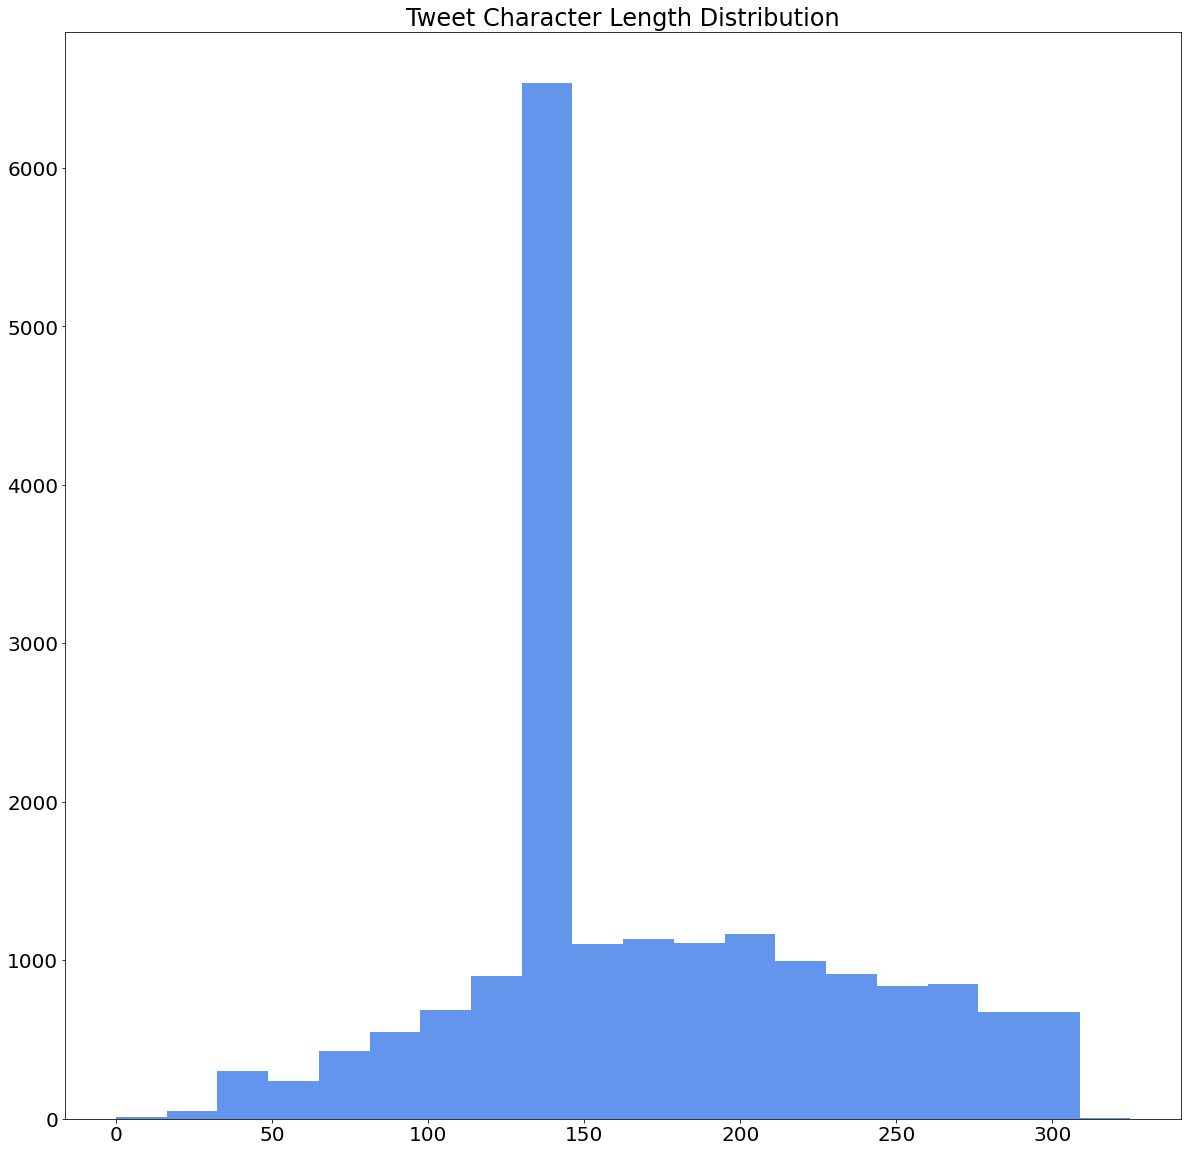

In [111]:
plt.figure(figsize=(20,20)) 

plt.title("Tweet Character Length Distribution", loc = 'center'), 
plt.hist(mx_political_eda['tweet_char_length'], range=(0,325), bins=20, color='cornflowerblue');

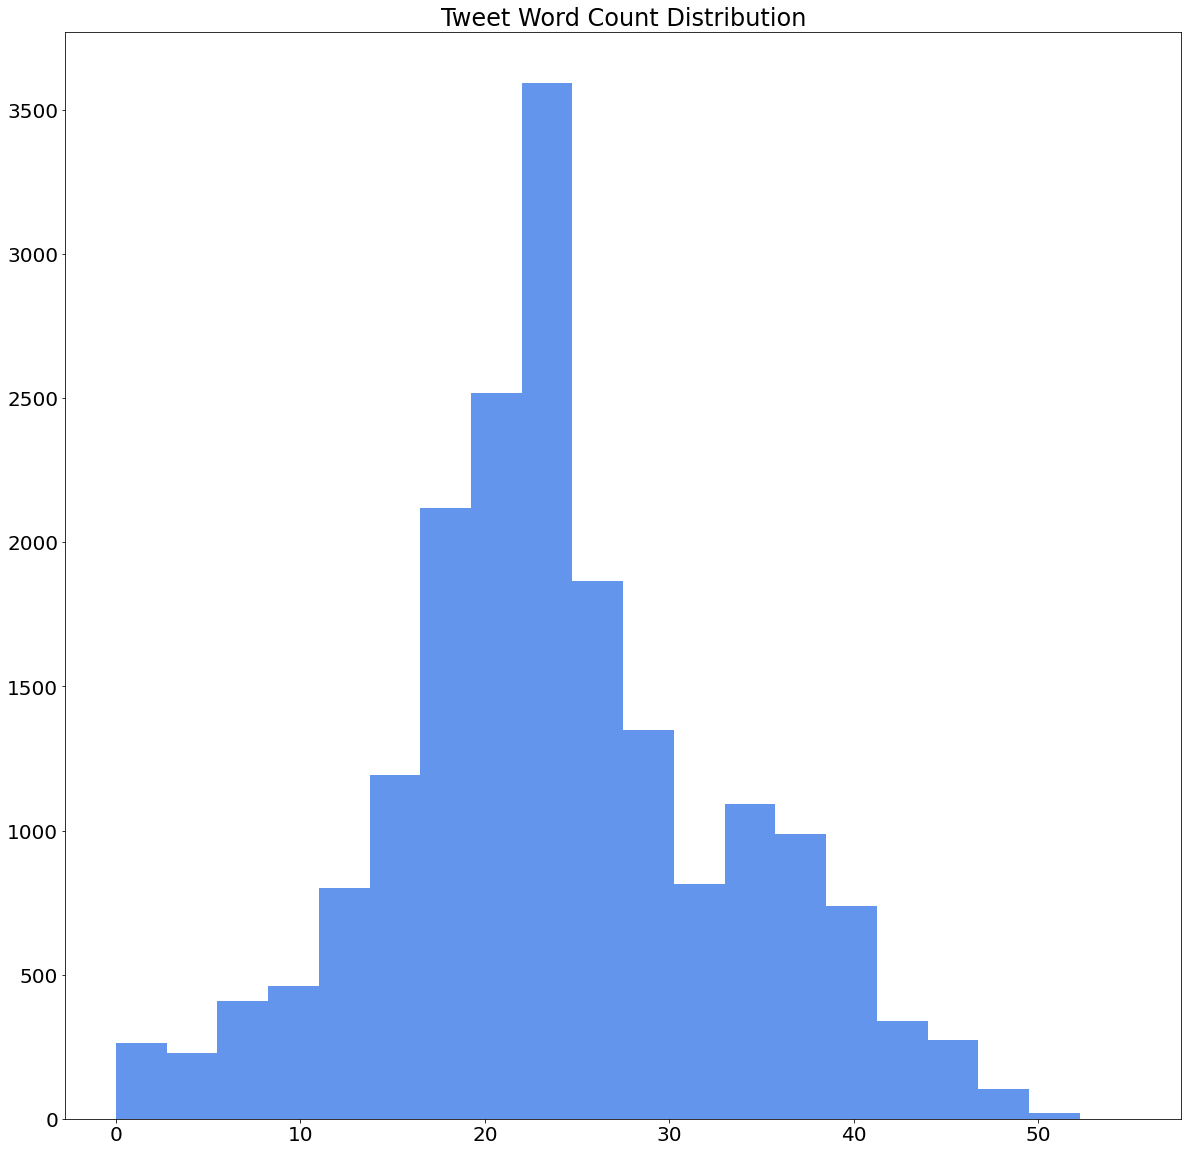

In [112]:
plt.figure(figsize=(20,20)) 

plt.title("Tweet Word Count Distribution", loc = 'center'), 
plt.hist(mx_political_eda['tweet_word_count'], range=(0,55), bins=20, color = 'cornflowerblue');

## N-grams

### 10 Most Common Unigrams

In [31]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into unigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common unigrams.
cvec_uni = CountVectorizer(ngram_range=(1, 1), stop_words=frozenset(spanish), lowercase=True)

pan_uni_tweets = cvec_uni.fit_transform(pan_df['tweet'])

pan_uni_tweets_df = pd.DataFrame(data=pan_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pan_most_common_unigrams = pan_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_unigrams

méxico            502
gobierno          399
familias          322
nacional          282
país              280
morena            250
presidente        230
markocortes       203
accionnacional    196
junio             190
dtype: int64

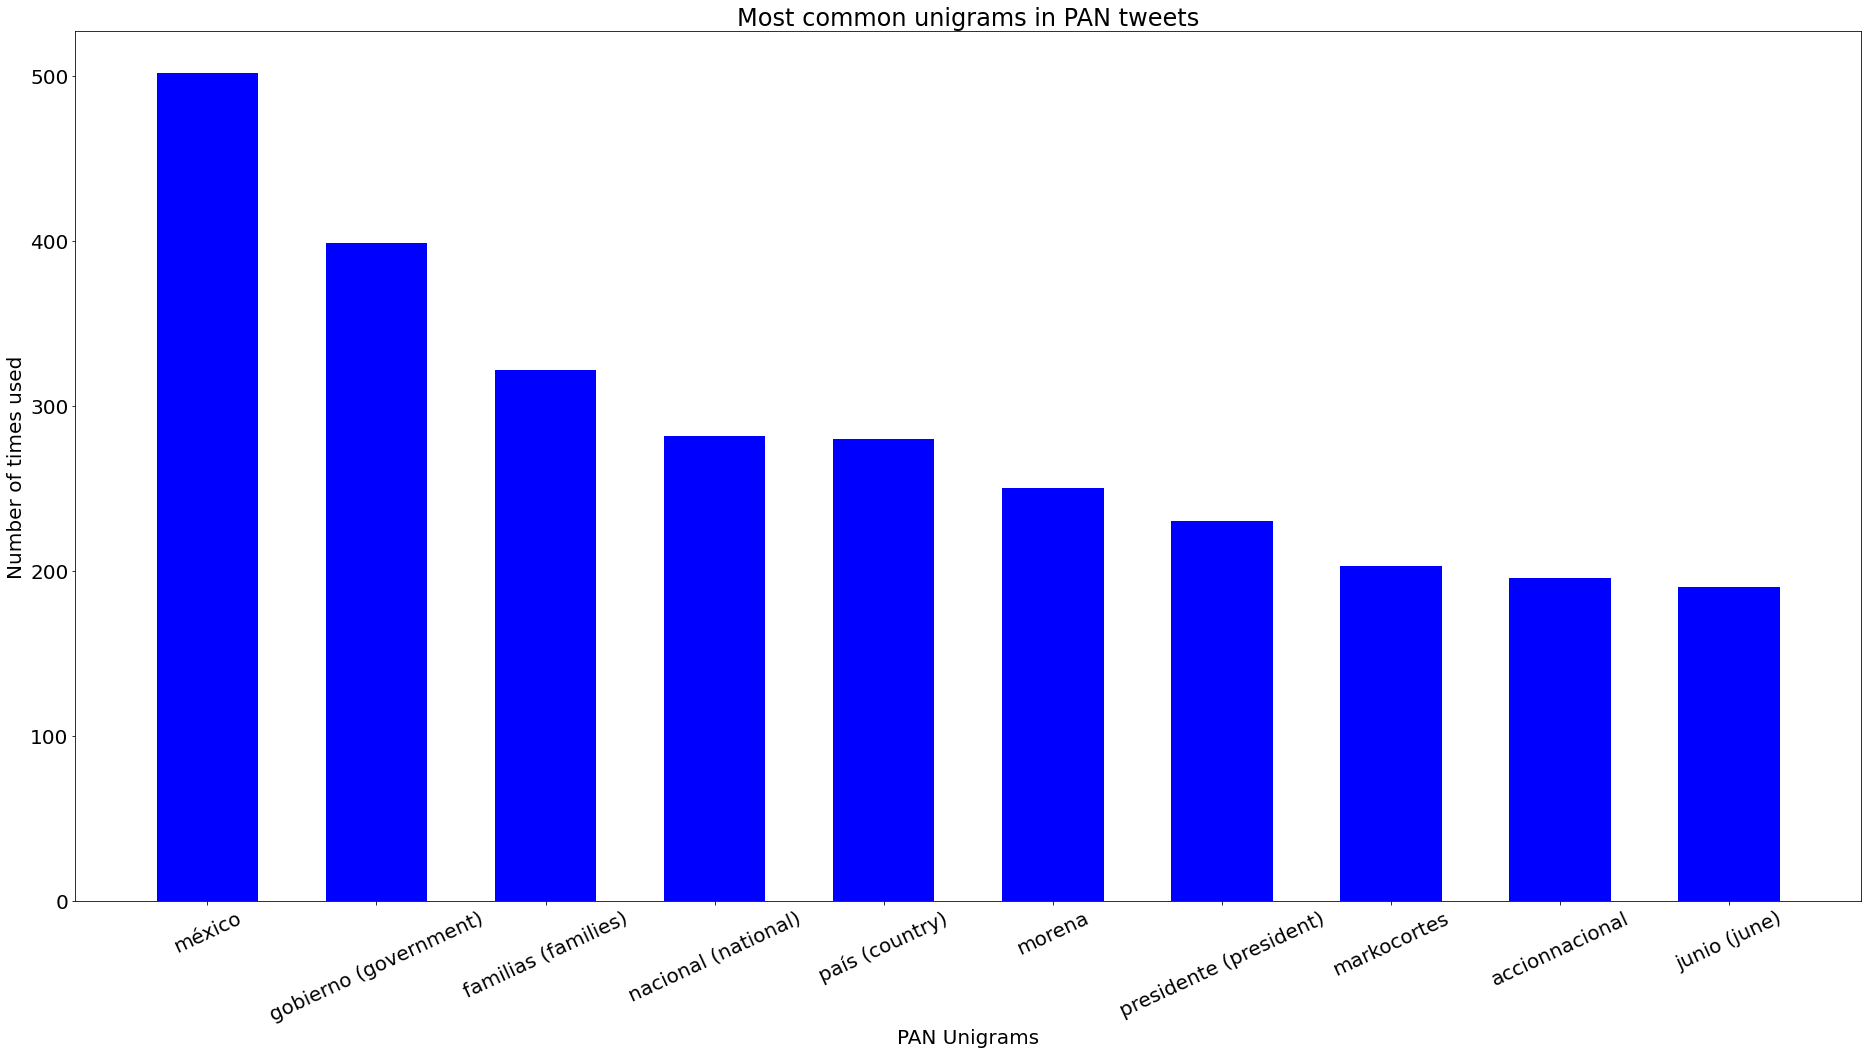

In [34]:
# creating the dataset
data = {'méxico':502, 'gobierno (government)':399, 'familias (families)':322,
        'nacional (national)':282, 'país (country)':280, 'morena':250, 'presidente (president)':230,
        'markocortes':203, 'accionnacional':196, 'junio (june)':190}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.6)
 
plt.xlabel("PAN Unigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common unigrams in PAN tweets")
plt.show()

In [33]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common unigrams.

pri_uni_tweets = cvec_uni.fit_transform(pri_df['tweet'])

pri_uni_tweets_df = pd.DataFrame(data=pri_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pri_most_common_unigrams = pri_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_unigrams

alitomorenoc    762
méxico          574
pri             555
presidente      467
morena          340
partido         303
familias        294
votapri         289
junio           286
mujeres         280
dtype: int64

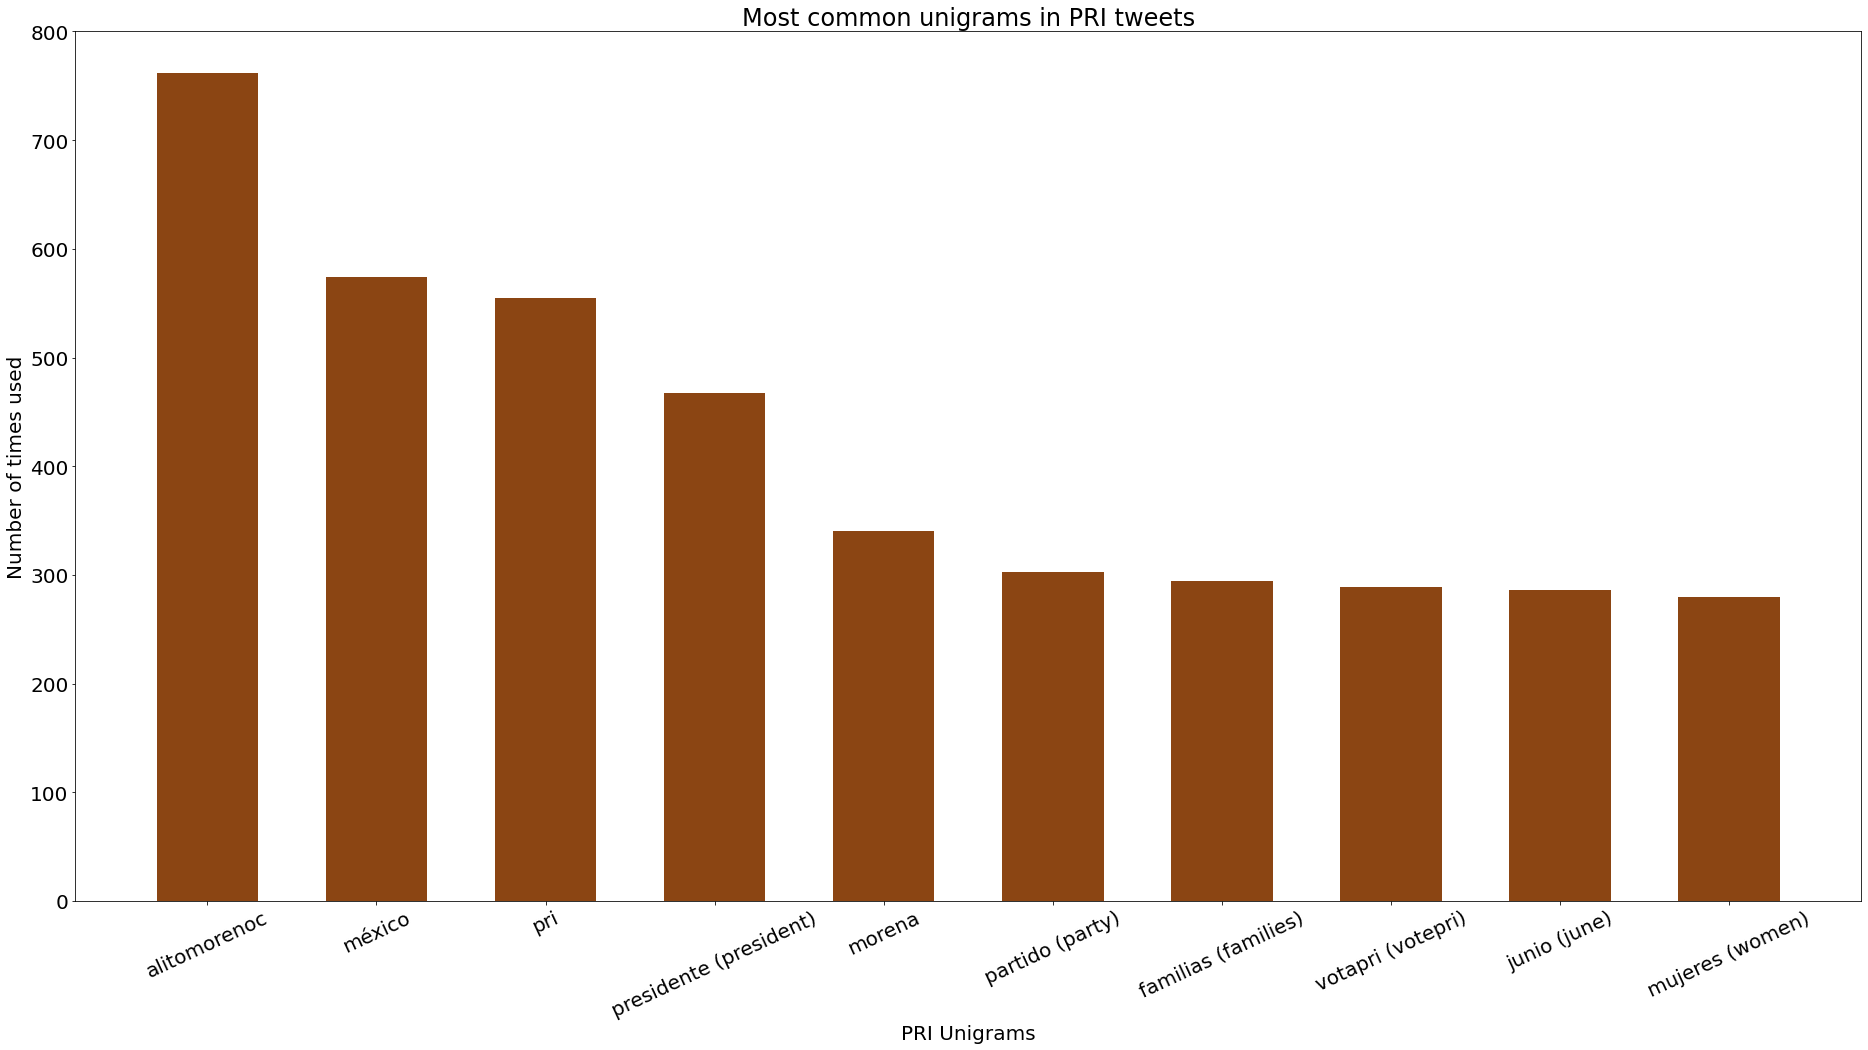

In [113]:
# creating the dataset
data = {'alitomorenoc':762, 'méxico':574, 'pri':555,
        'presidente (president)':467, 'morena':340, 'partido (party)':303, 'familias (families)':294,
        'votapri (votepri)':289, 'junio (june)':286, 'mujeres (women)':280}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='saddlebrown',
        width = 0.6)
 
plt.xlabel("PRI Unigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common unigrams in PRI tweets")
plt.show()

In [33]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common unigrams.

prd_uni_tweets = cvec_uni.fit_transform(prd_df['tweet'])

prd_uni_tweets_df = pd.DataFrame(data=prd_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

prd_most_common_unigrams = prd_uni_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_unigrams

prdmexico          848
méxico             397
prd                394
jesus_zambranog    370
laufdzoficial      220
gobierno           211
mujeres            183
votaprd            156
_avilesalvarez     143
caroviggiano       140
dtype: int64

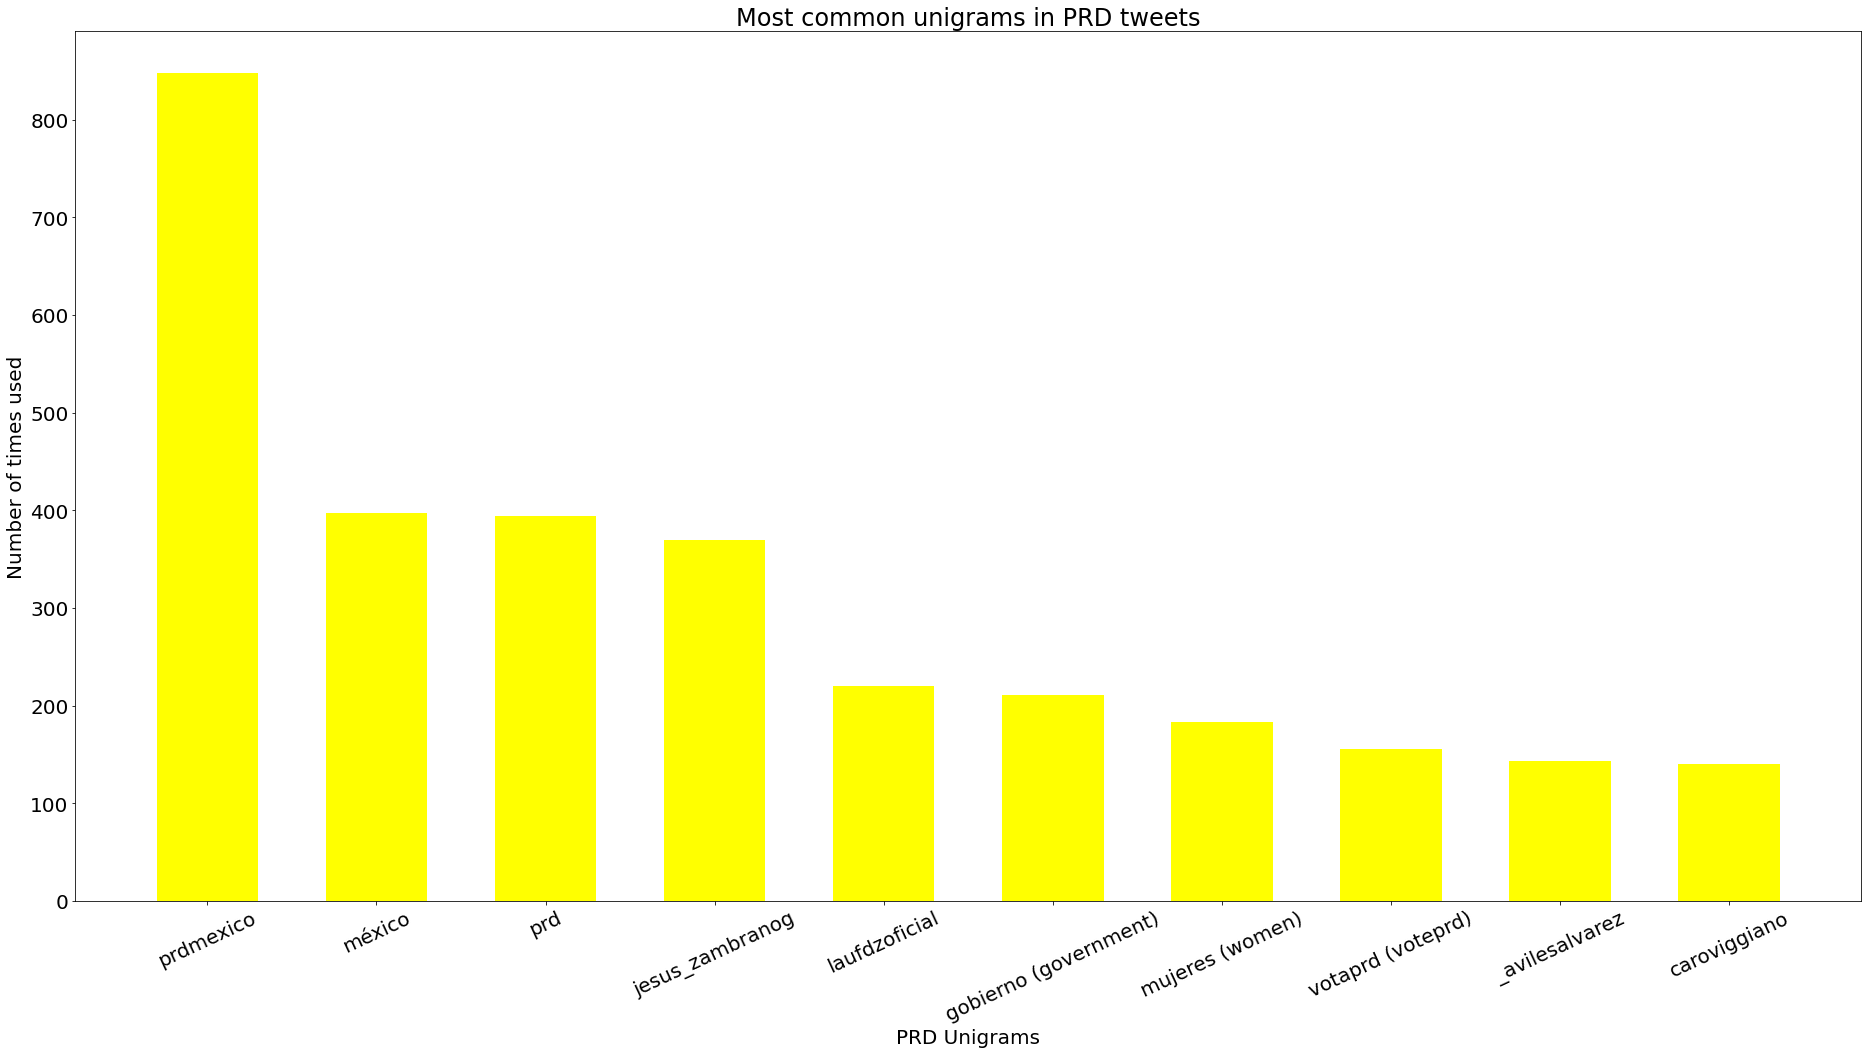

In [37]:
# creating the dataset
data = {'prdmexico':848, 'méxico':397, 'prd':394,
        'jesus_zambranog':370, 'laufdzoficial':220, 'gobierno (government)':211, 'mujeres (women)':183,
        'votaprd (voteprd)':156, '_avilesalvarez':143, 'caroviggiano':140}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='yellow',
        width = 0.6)
 
plt.xlabel("PRD Unigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common unigrams in PRD tweets")
plt.show()

In [34]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common unigrams.

pv_uni_tweets = cvec_uni.fit_transform(pv_df['tweet'])

pv_uni_tweets_df = pd.DataFrame(data=pv_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pv_most_common_unigrams = pv_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_unigrams

país               311
verde              268
méxico             259
sen                253
dip                247
ambiente           245
karencastrejont    212
salud              182
méxicoverde        168
partido            155
dtype: int64

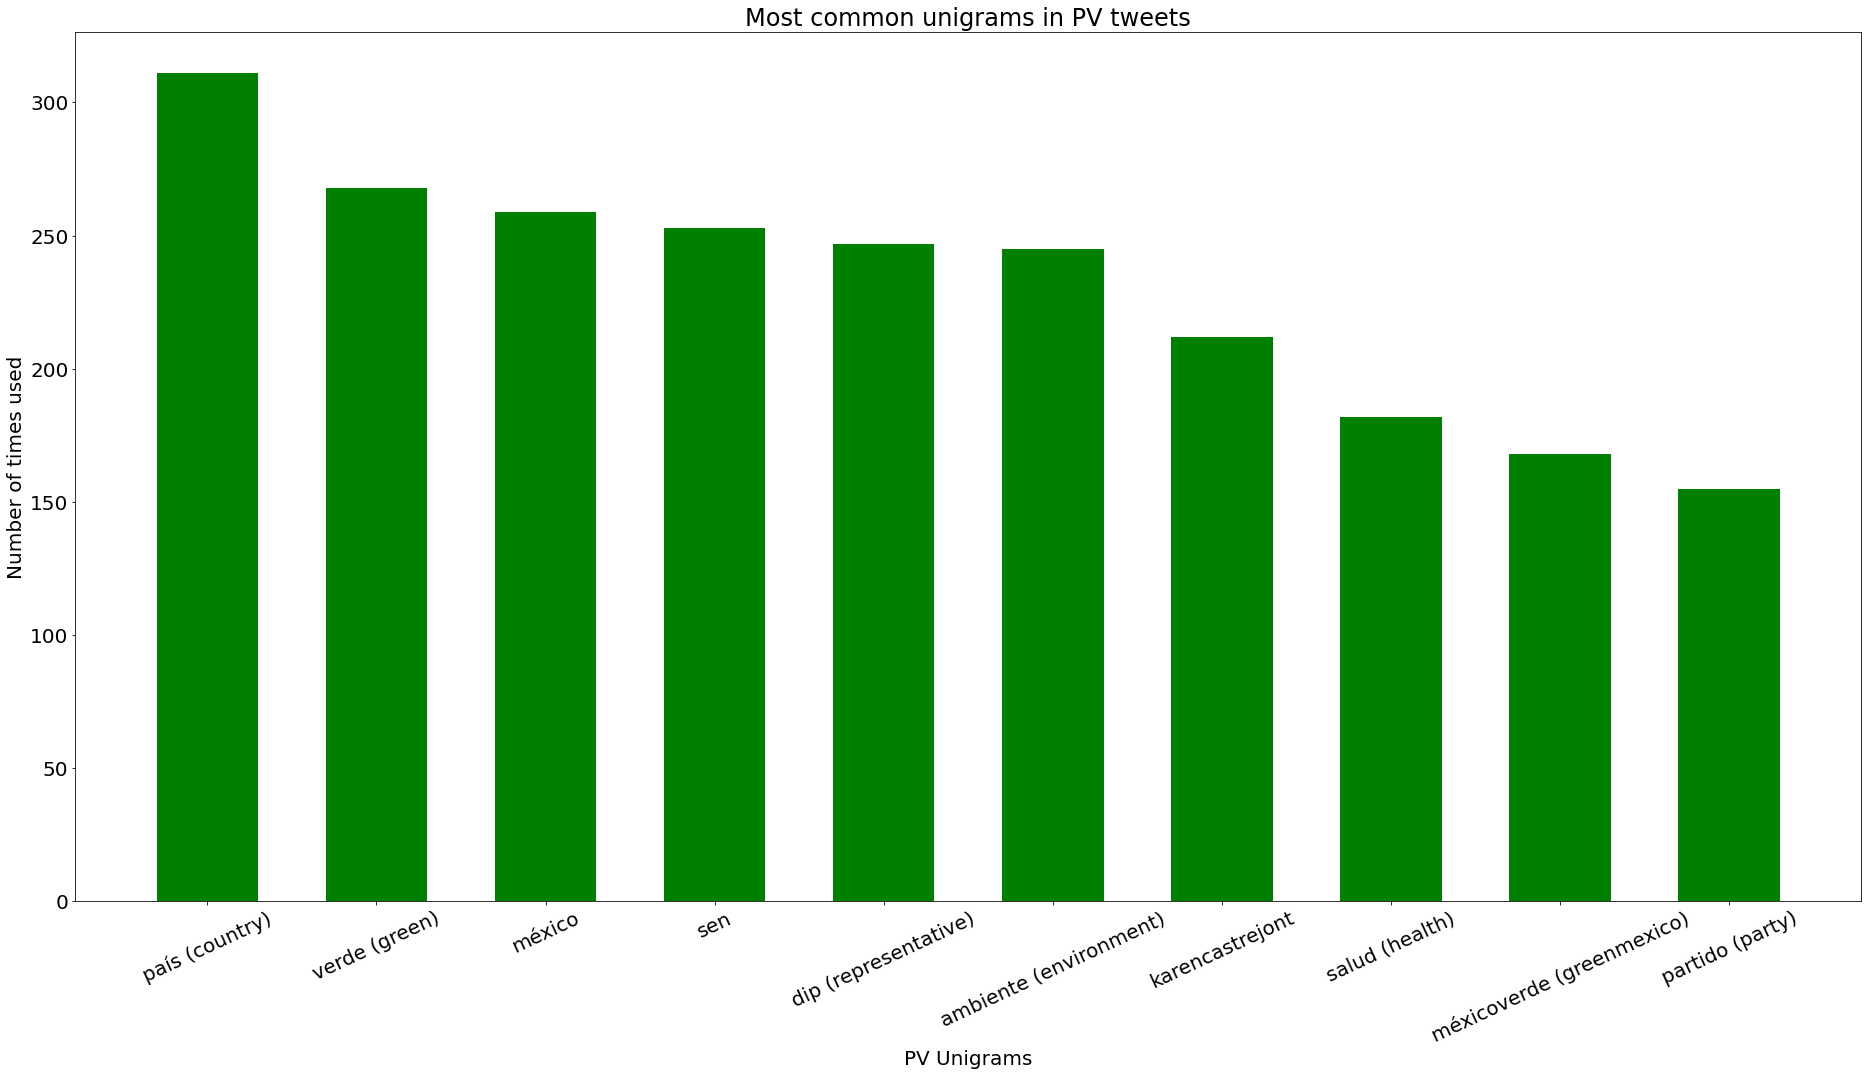

In [42]:
# creating the dataset
data = {'país (country)':311, 'verde (green)':268, 'méxico':259,
        'sen':253, 'dip (representative)':247, 'ambiente (environment)':245, 'karencastrejont':212,
        'salud (health)':182, 'méxicoverde (greenmexico)':168, 'partido (party)':155}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.6)
 
plt.xlabel("PV Unigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common unigrams in PV tweets")
plt.show()

In [35]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common unigrams.

mc_uni_tweets = cvec_uni.fit_transform(mc_df['tweet'])

mc_uni_tweets_df = pd.DataFrame(data=mc_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

mc_most_common_unigrams = mc_uni_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_unigrams

futuro                 307
movimiento             294
elfuturoesnaranja      278
gobierno               227
méxico                 215
delríopresopolítico    175
bancadanaranja         171
pablo_vah              164
mujeres                159
clementech             156
dtype: int64

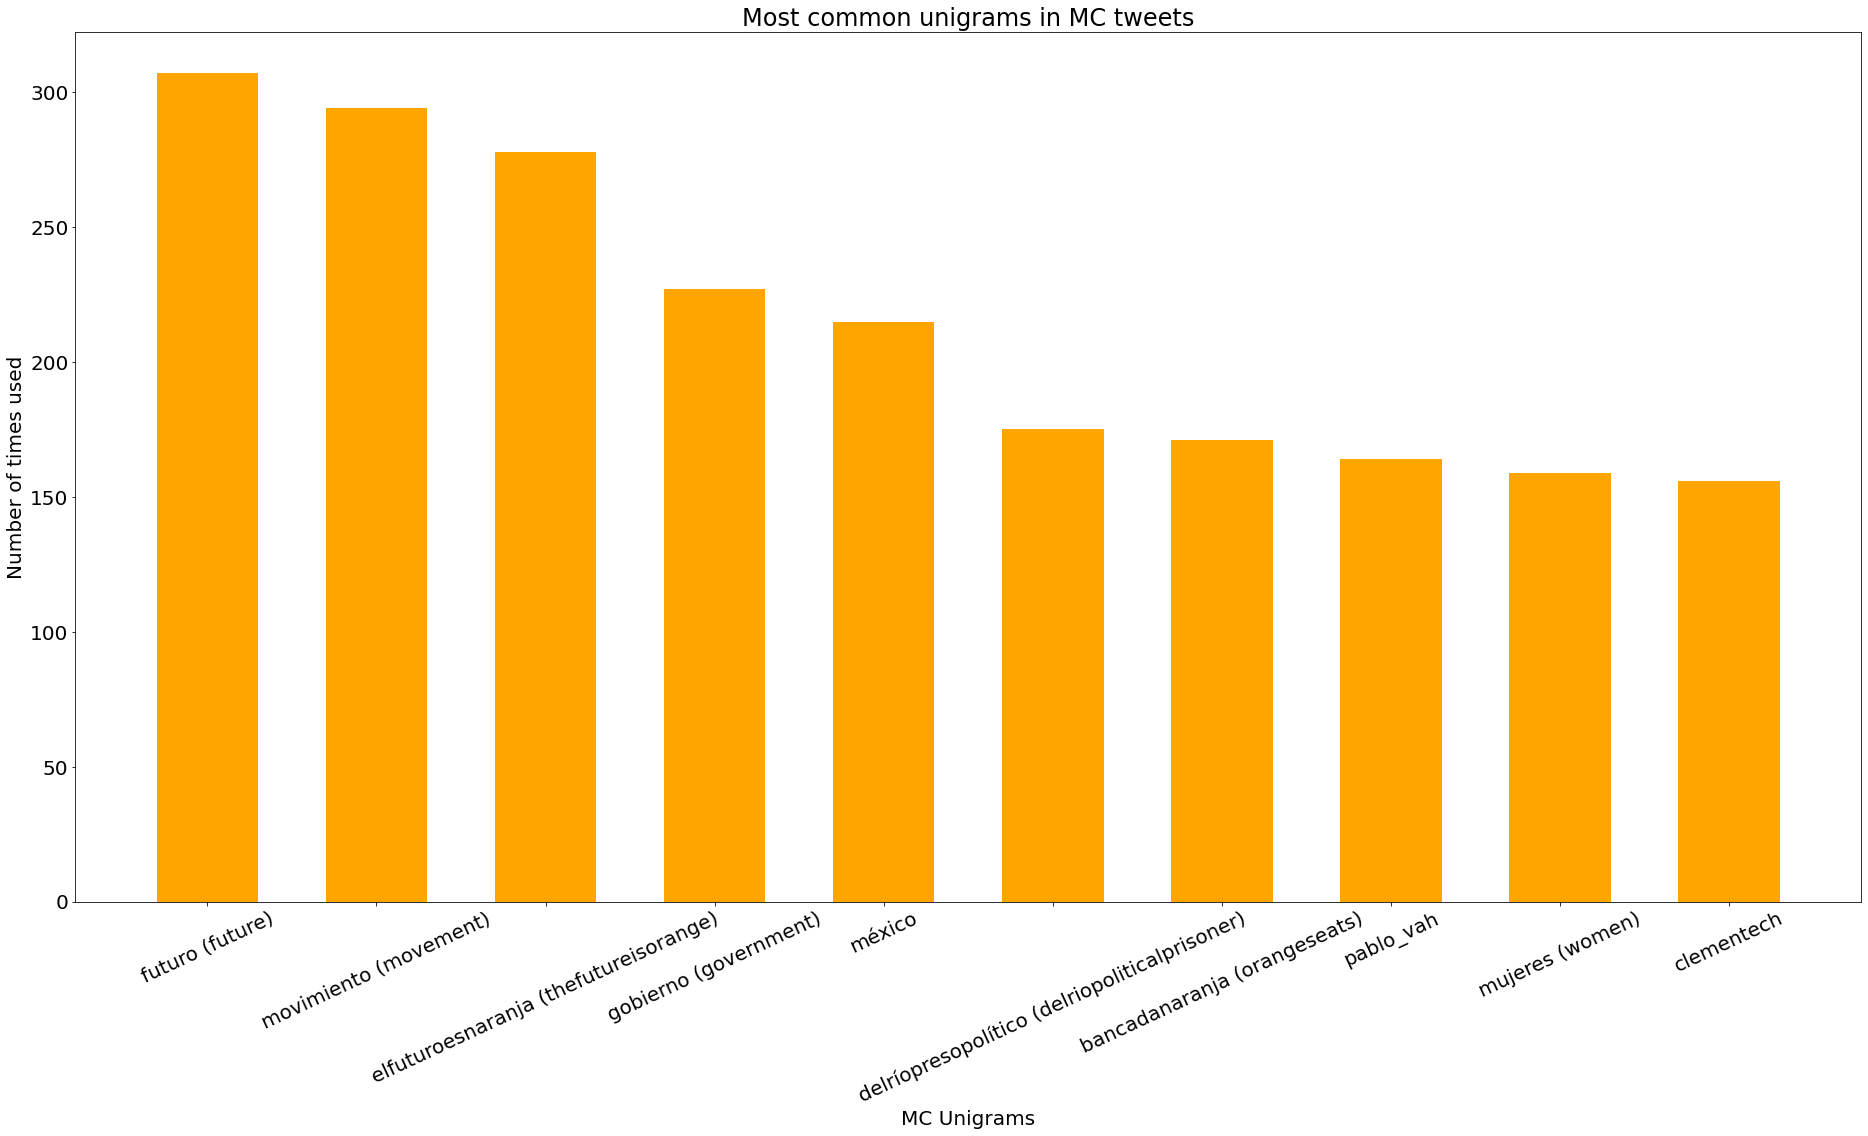

In [43]:
# creating the dataset
data = {'futuro (future)':307, 'movimiento (movement)':294, 'elfuturoesnaranja (thefutureisorange)':278,
        'gobierno (government)':227, 'méxico':215, 'delríopresopolítico (delriopoliticalprisoner)':175, 'bancadanaranja (orangeseats)':171,
        'pablo_vah':164, 'mujeres (women)':159, 'clementech':156}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='orange',
        width = 0.6)
 
plt.xlabel("MC Unigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common unigrams in MC tweets")
plt.show()

In [36]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common unigrams.

mrn_uni_tweets = cvec_uni.fit_transform(mrn_df['tweet'])

mrn_uni_tweets_df = pd.DataFrame(data=mrn_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

mrn_most_common_unigrams = mrn_uni_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_unigrams

presidente               815
pueblo                   749
méxico                   748
lopezobrador_            698
conferenciapresidente    647
4t                       411
22                       324
transformación           267
democracia               240
país                     218
dtype: int64

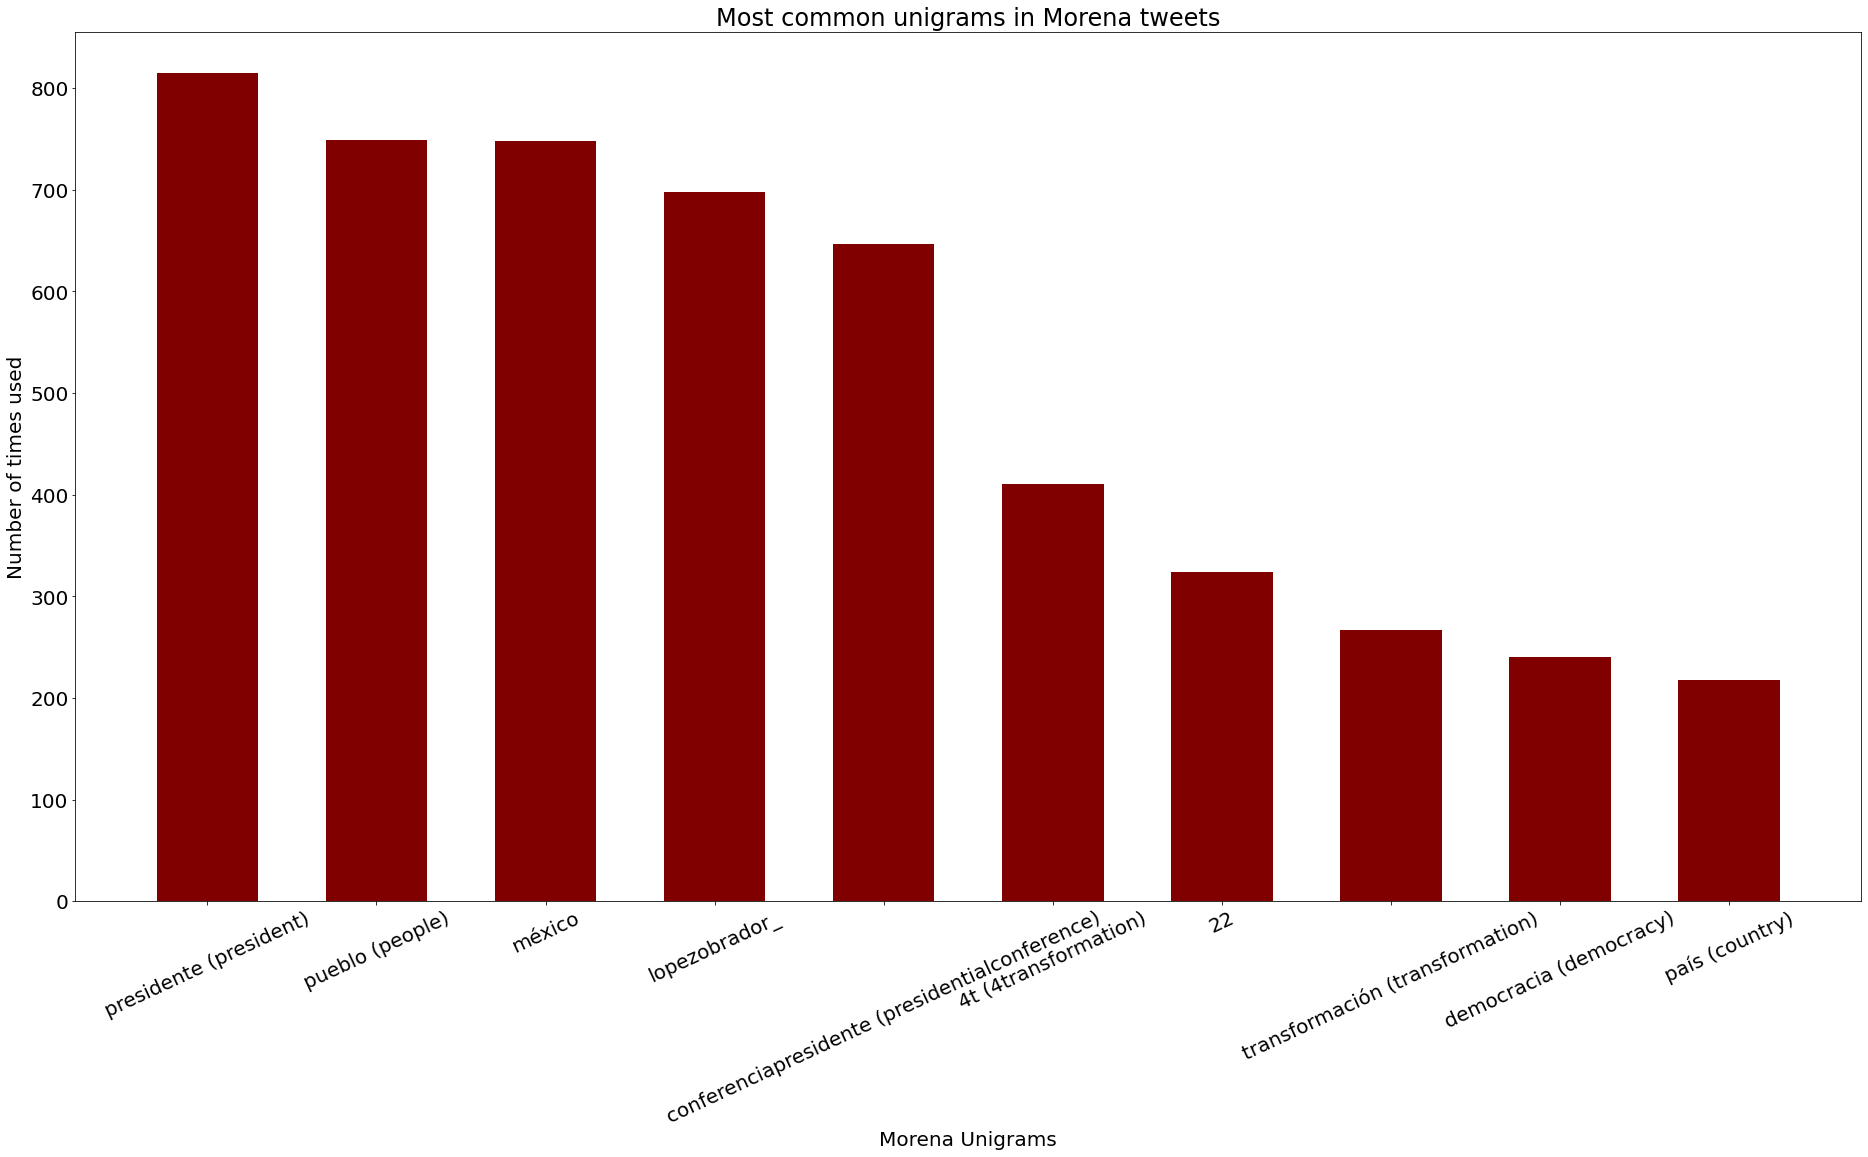

In [47]:
# creating the dataset
data = {'presidente (president)':815, 'pueblo (people)':749, 'méxico':748,
        'lopezobrador_':698, 'conferenciapresidente (presidentialconference)':647, '4t (4transformation)':411, '22':324,
        'transformación (transformation)':267, 'democracia (democracy)':240, 'país (country)':218}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.6)
 
plt.xlabel("Morena Unigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common unigrams in Morena tweets")
plt.show()

### 10 Most Common Bigrams

In [37]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into bigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common bigrams.
cvec_bi = CountVectorizer(ngram_range=(2, 2), stop_words=frozenset(spanish), lowercase=True)

pan_bi_tweets = cvec_bi.fit_transform(pan_df['tweet'])

pan_bi_tweets_df = pd.DataFrame(data=pan_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pan_most_common_bigrams = pan_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_bigrams

acción nacional       162
gobierno federal       82
familias mexicanas     72
energías limpias       70
descanse paz           53
junio votapan          48
cambiar rumbo          43
cámara diputados       42
seres queridos         42
rumbo méxico           40
dtype: int64

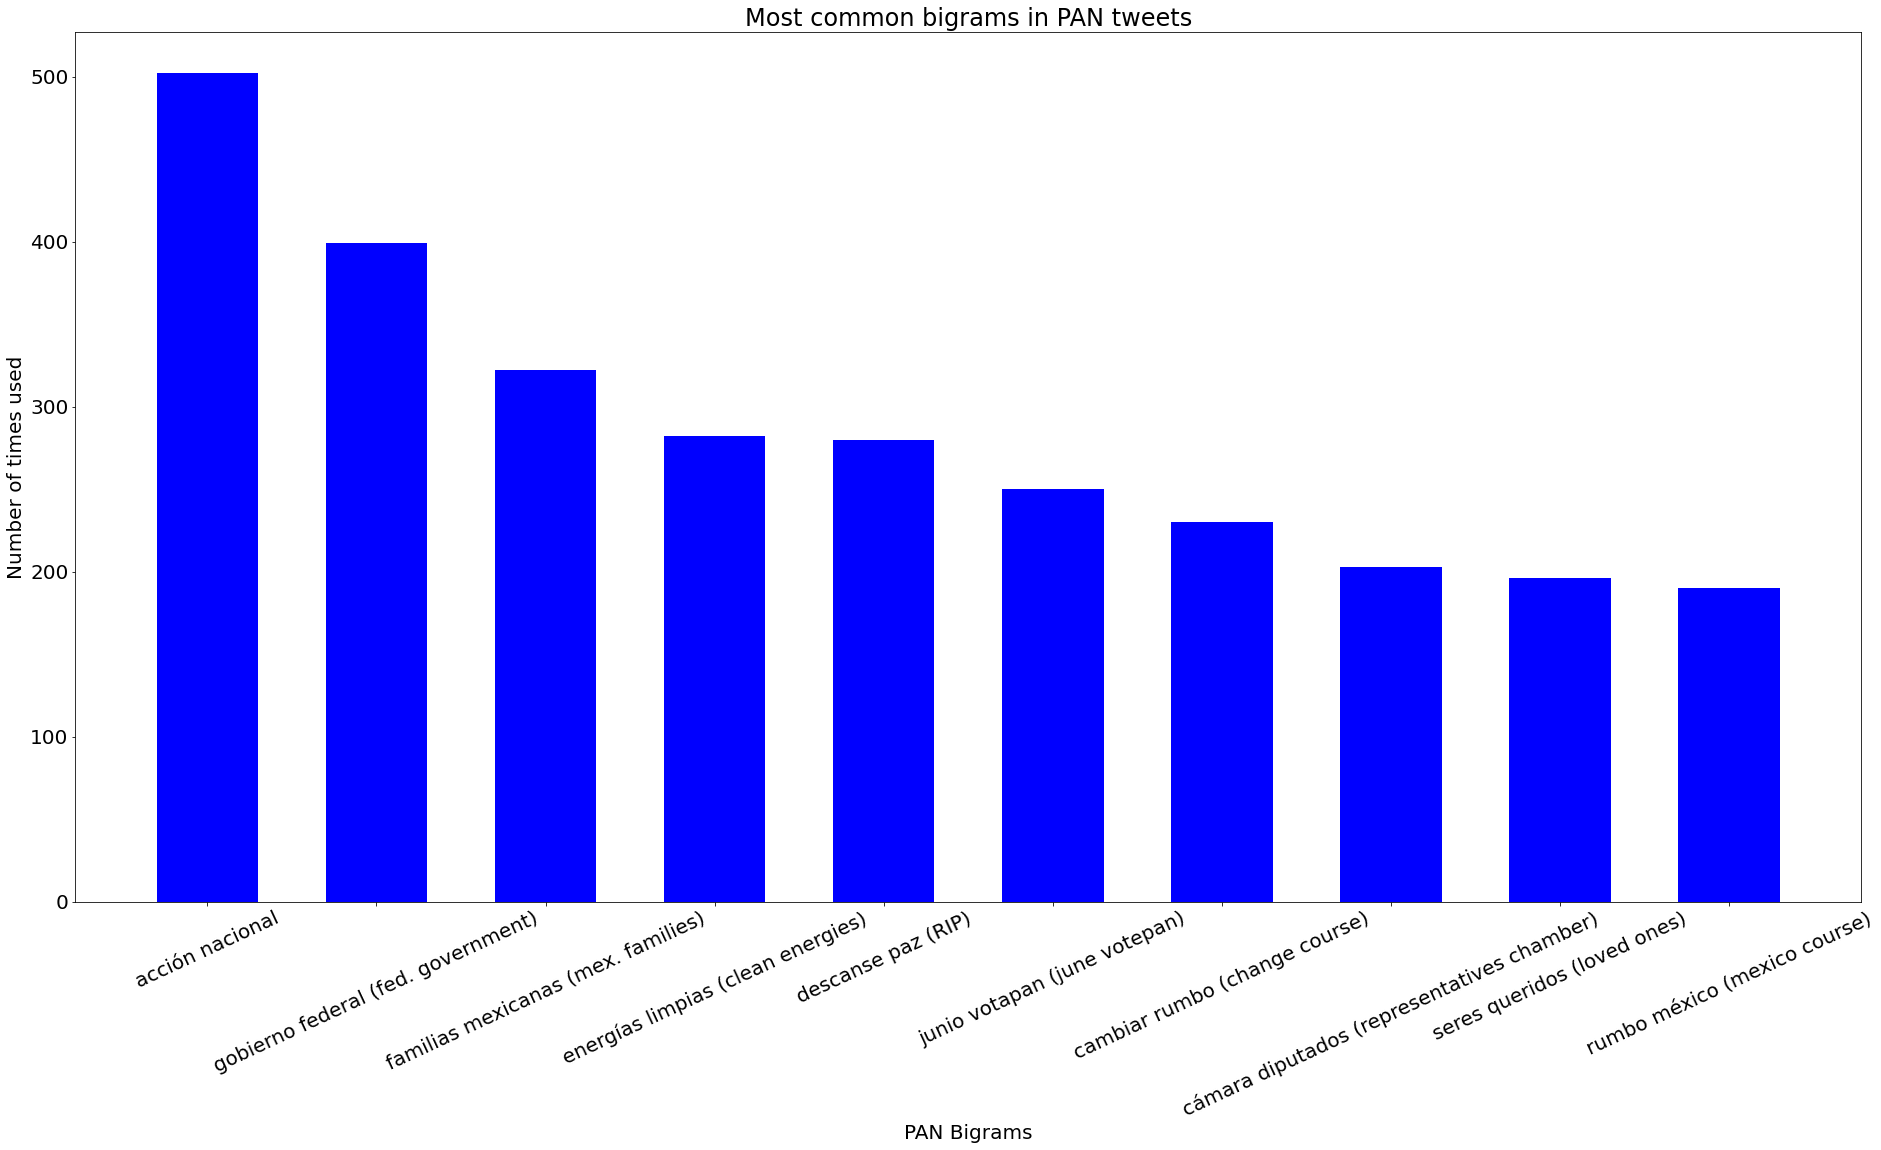

In [49]:
# creating the dataset
data = {'acción nacional':502, 'gobierno federal (fed. government)':399, 'familias mexicanas (mex. families)':322,
        'energías limpias (clean energies)':282, 'descanse paz (RIP)':280, 'junio votapan (june votepan)':250, 'cambiar rumbo (change course)':230,
        'cámara diputados (representatives chamber)':203, 'seres queridos (loved ones)':196, 'rumbo méxico (mexico course)':190}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.6)
 
plt.xlabel("PAN Bigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common bigrams in PAN tweets")
plt.show()

In [38]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common bigrams.

pri_bi_tweets = cvec_bi.fit_transform(pri_df['tweet'])

pri_bi_tweets_df = pd.DataFrame(data=pri_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pri_most_common_bigrams = pri_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_bigrams

presidente alitomorenoc    376
cámara diputados            59
diputados federales         55
mujeres hombres             52
candidatas candidatos       51
junio votapri               51
familias mexicanas          51
ganar junio                 48
diputadas diputados         39
invitamos seguir            39
dtype: int64

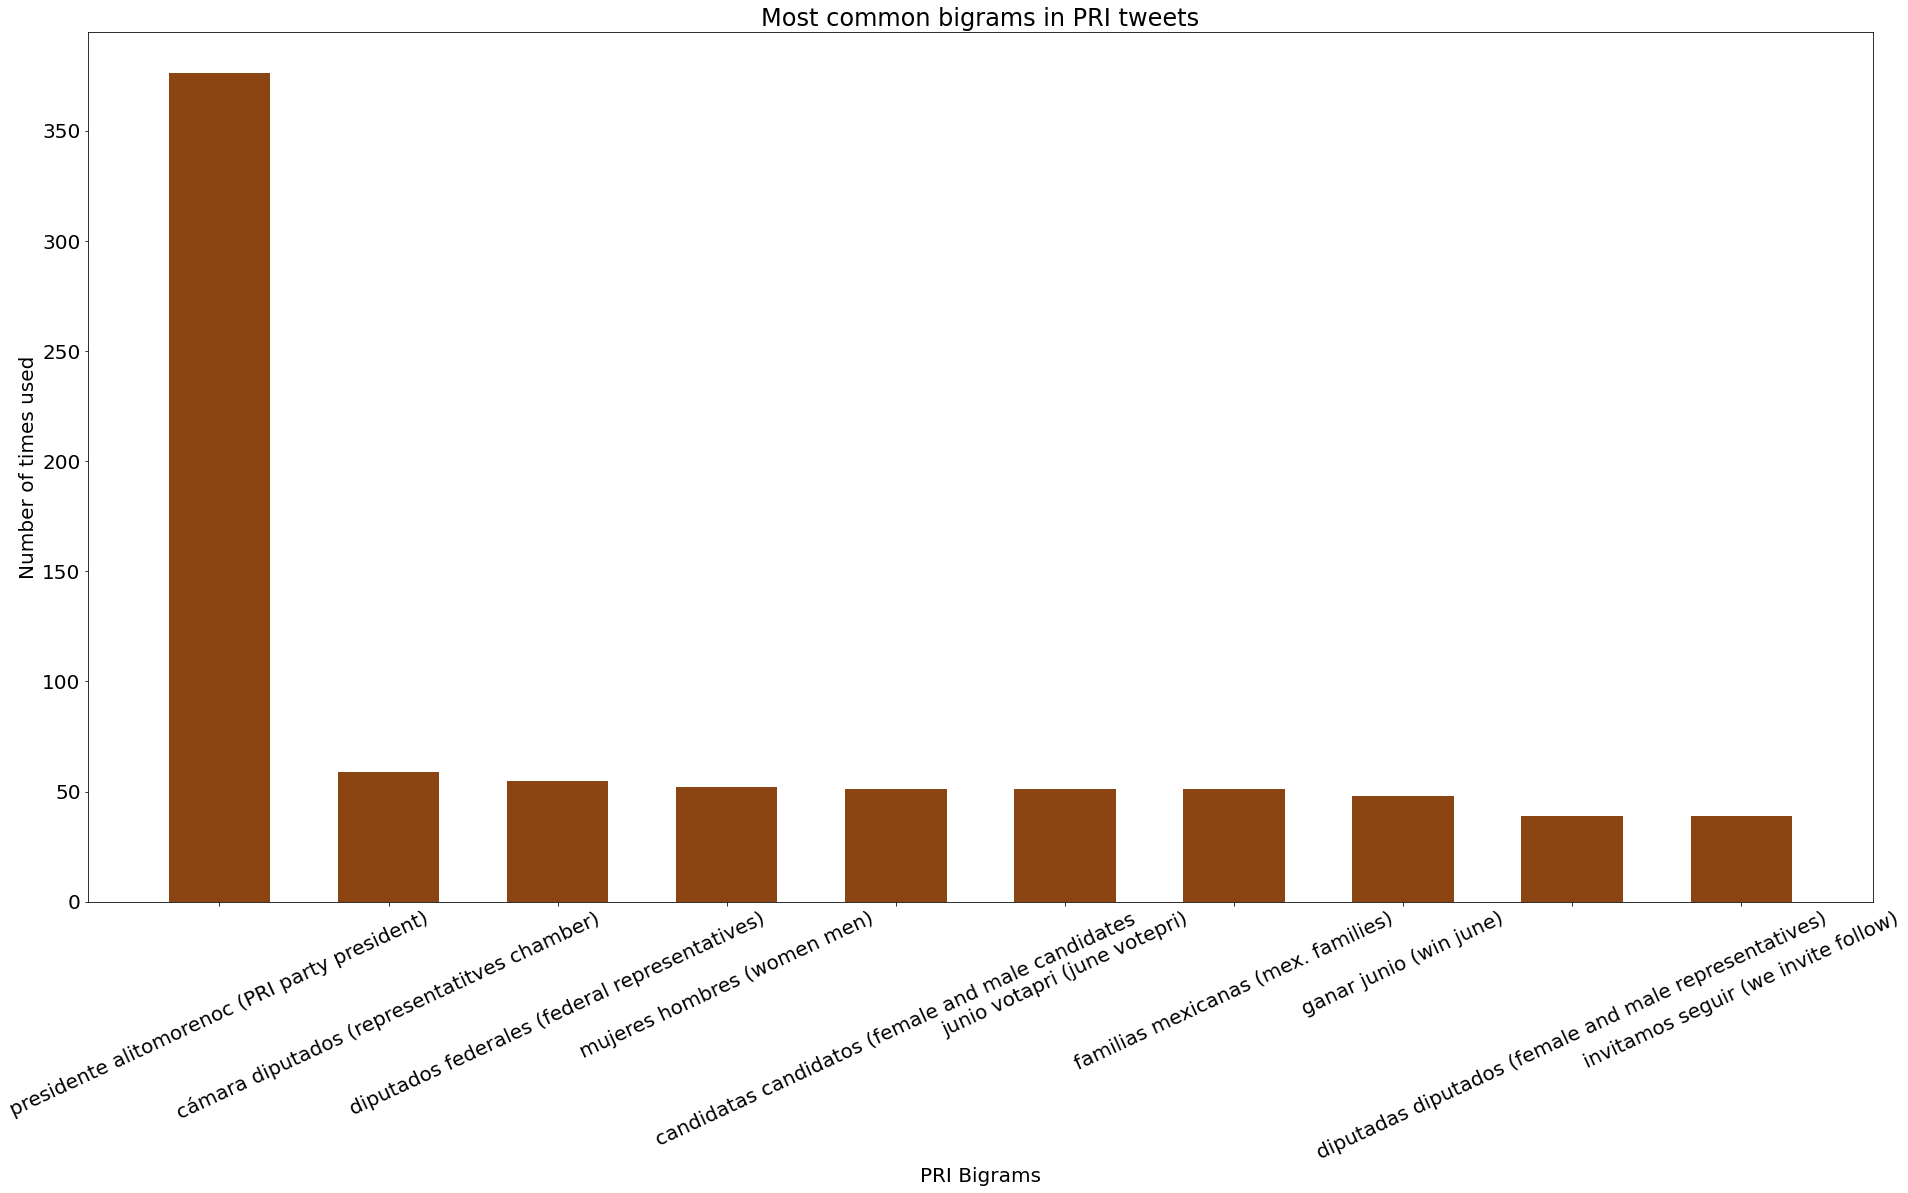

In [114]:
# creating the dataset
data = {'presidente alitomorenoc (PRI party president)':376, 'cámara diputados (representatitves chamber)':59, 'diputados federales (federal representatives)':55,
        'mujeres hombres (women men)':52, 'candidatas candidatos (female and male candidates':51, 'junio votapri (june votepri)':51, 'familias mexicanas (mex. families)':51,
        'ganar junio (win june)':48, 'diputadas diputados (female and male representatives)':39, 'invitamos seguir (we invite follow)':39}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='saddlebrown',
        width = 0.6)
 
plt.xlabel("PRI Bigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common bigrams in PRI tweets")
plt.show()

In [39]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common bigrams.

prd_bi_tweets = cvec_bi.fit_transform(prd_df['tweet'])

prd_bi_tweets_df = pd.DataFrame(data=prd_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

prd_most_common_bigrams = prd_bi_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_bigrams

gobierno federal        75
link boletín            60
prdmexico prd           56
niñas niños             53
delfina gómez           52
juntas juntos           42
33 años                 37
jesus_zambranog link    36
palacio nacional        35
millones estudiantes    34
dtype: int64

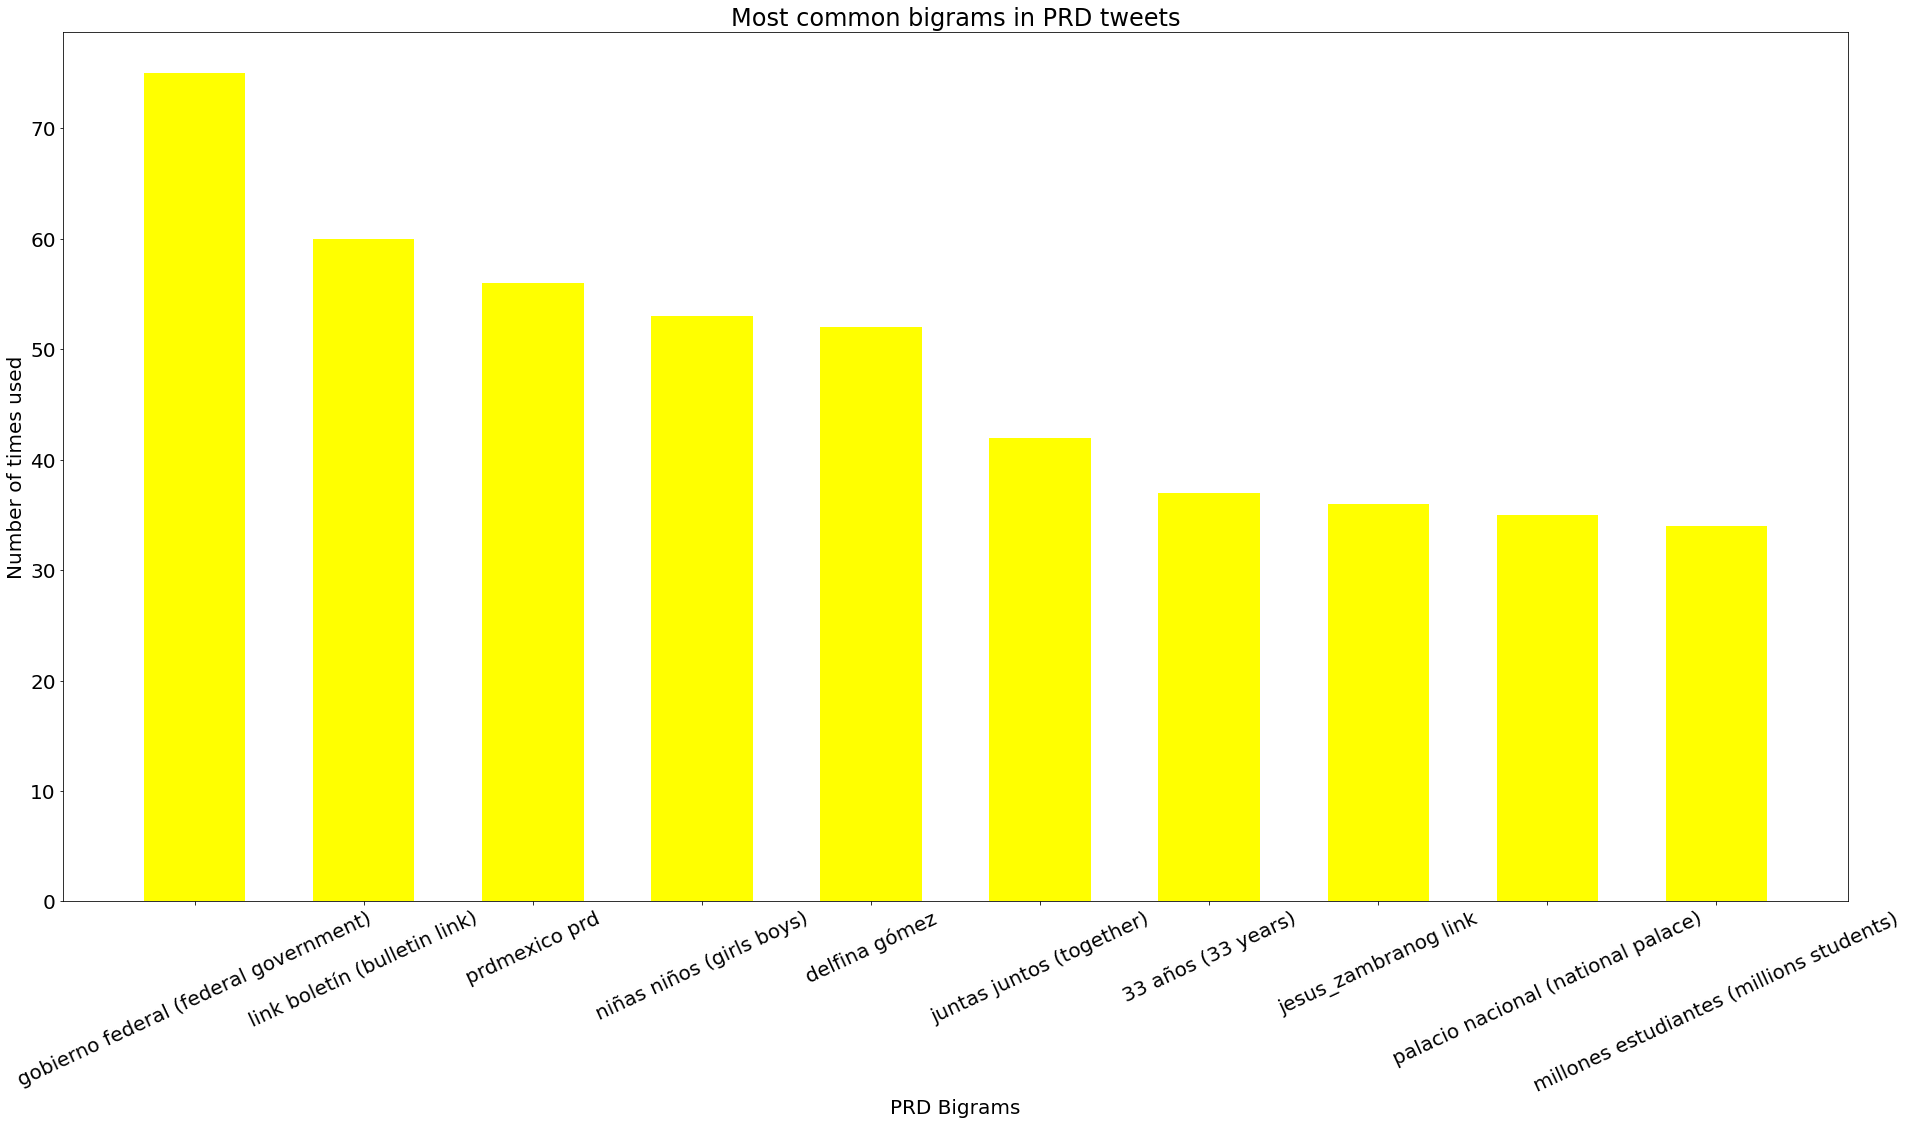

In [52]:
# creating the dataset
data = {'gobierno federal (federal government)':75, 'link boletín (bulletin link)':60, 'prdmexico prd':56,
        'niñas niños (girls boys)':53, 'delfina gómez':52, 'juntas juntos (together)':42, '33 años (33 years)':37,
        'jesus_zambranog link':36, 'palacio nacional (national palace)':35, 'millones estudiantes (millions students)':34}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='yellow',
        width = 0.6)
 
plt.xlabel("PRD Bigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common bigrams in PRD tweets")
plt.show()

In [40]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common bigrams.

pv_bi_tweets = cvec_bi.fit_transform(pv_df['tweet'])

pv_bi_tweets_df = pd.DataFrame(data=pv_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pv_most_common_bigrams = pv_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_bigrams

partido verde            112
sen raulbccue             77
covid 19                  75
dip arturoesc             53
dip betymanrique          45
enviamos felicitación     43
motivo cumpleaños         42
sen veronicacamino        37
pequeñas acciones         36
cumpleaños sigamos        35
dtype: int64

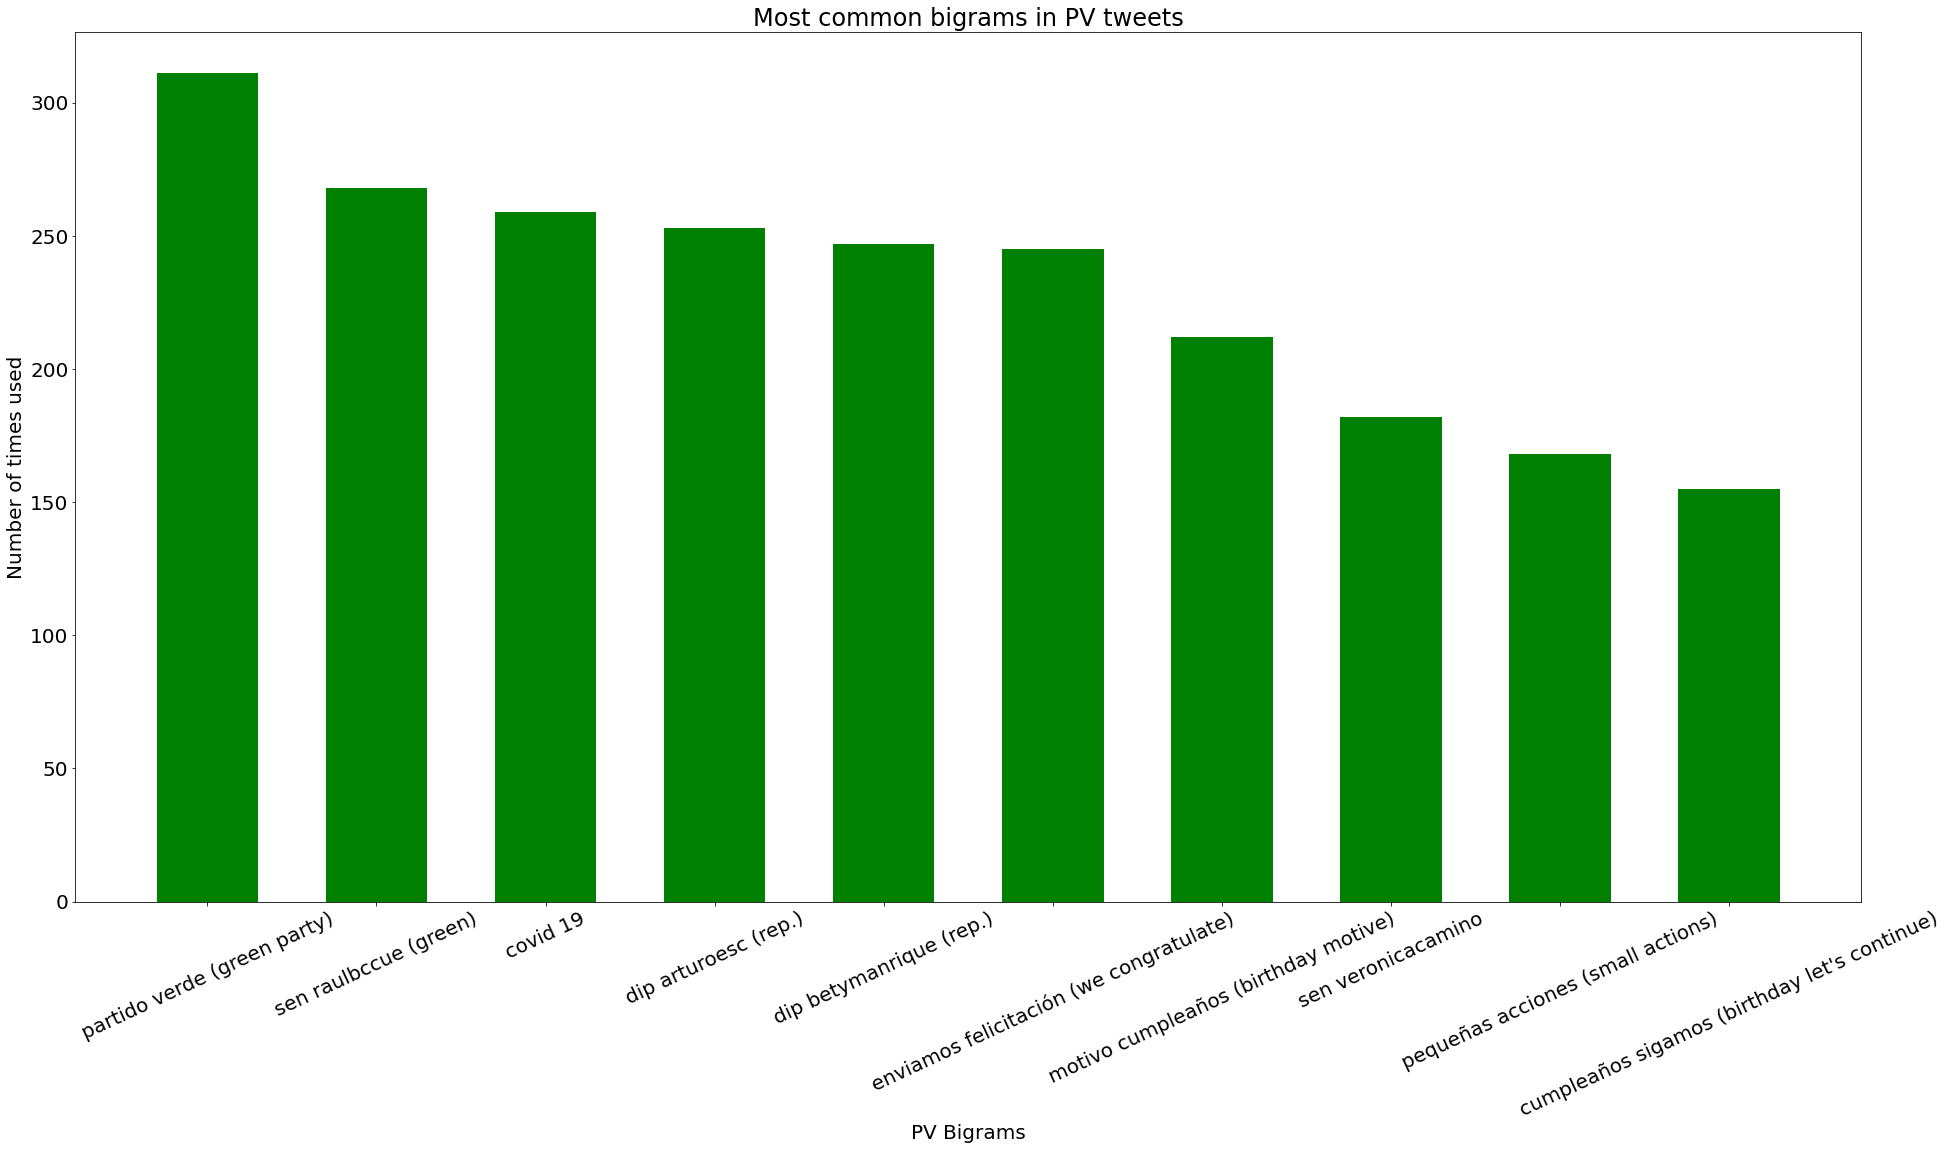

In [55]:
# creating the dataset
data = {'partido verde (green party)':112, 'sen raulbccue (green)':77, 'covid 19':75,
        'dip arturoesc (rep.)':53, 'dip betymanrique (rep.)':45, 'enviamos felicitación (we congratulate)':43, 'motivo cumpleaños (birthday motive)':42,
        'sen veronicacamino':37, 'pequeñas acciones (small actions)':36, 'cumpleaños sigamos (birthday let\'s continue)':35}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.6)
 
plt.xlabel("PV Bigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common bigrams in PV tweets")
plt.show()

In [41]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common bigrams.

mc_bi_tweets = cvec_bi.fit_transform(mc_df['tweet'])

mc_bi_tweets_df = pd.DataFrame(data=mc_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

mc_most_common_bigrams = mc_bi_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_bigrams

movimiento ciudadano       86
plataforma favorita        80
energías limpias           78
niñas niños                65
escúchanos plataforma      63
favorita spotify           55
gobierno federal           52
reformaeléctrica tóxica    49
trato ambiente             46
nuevotrato verde           40
dtype: int64

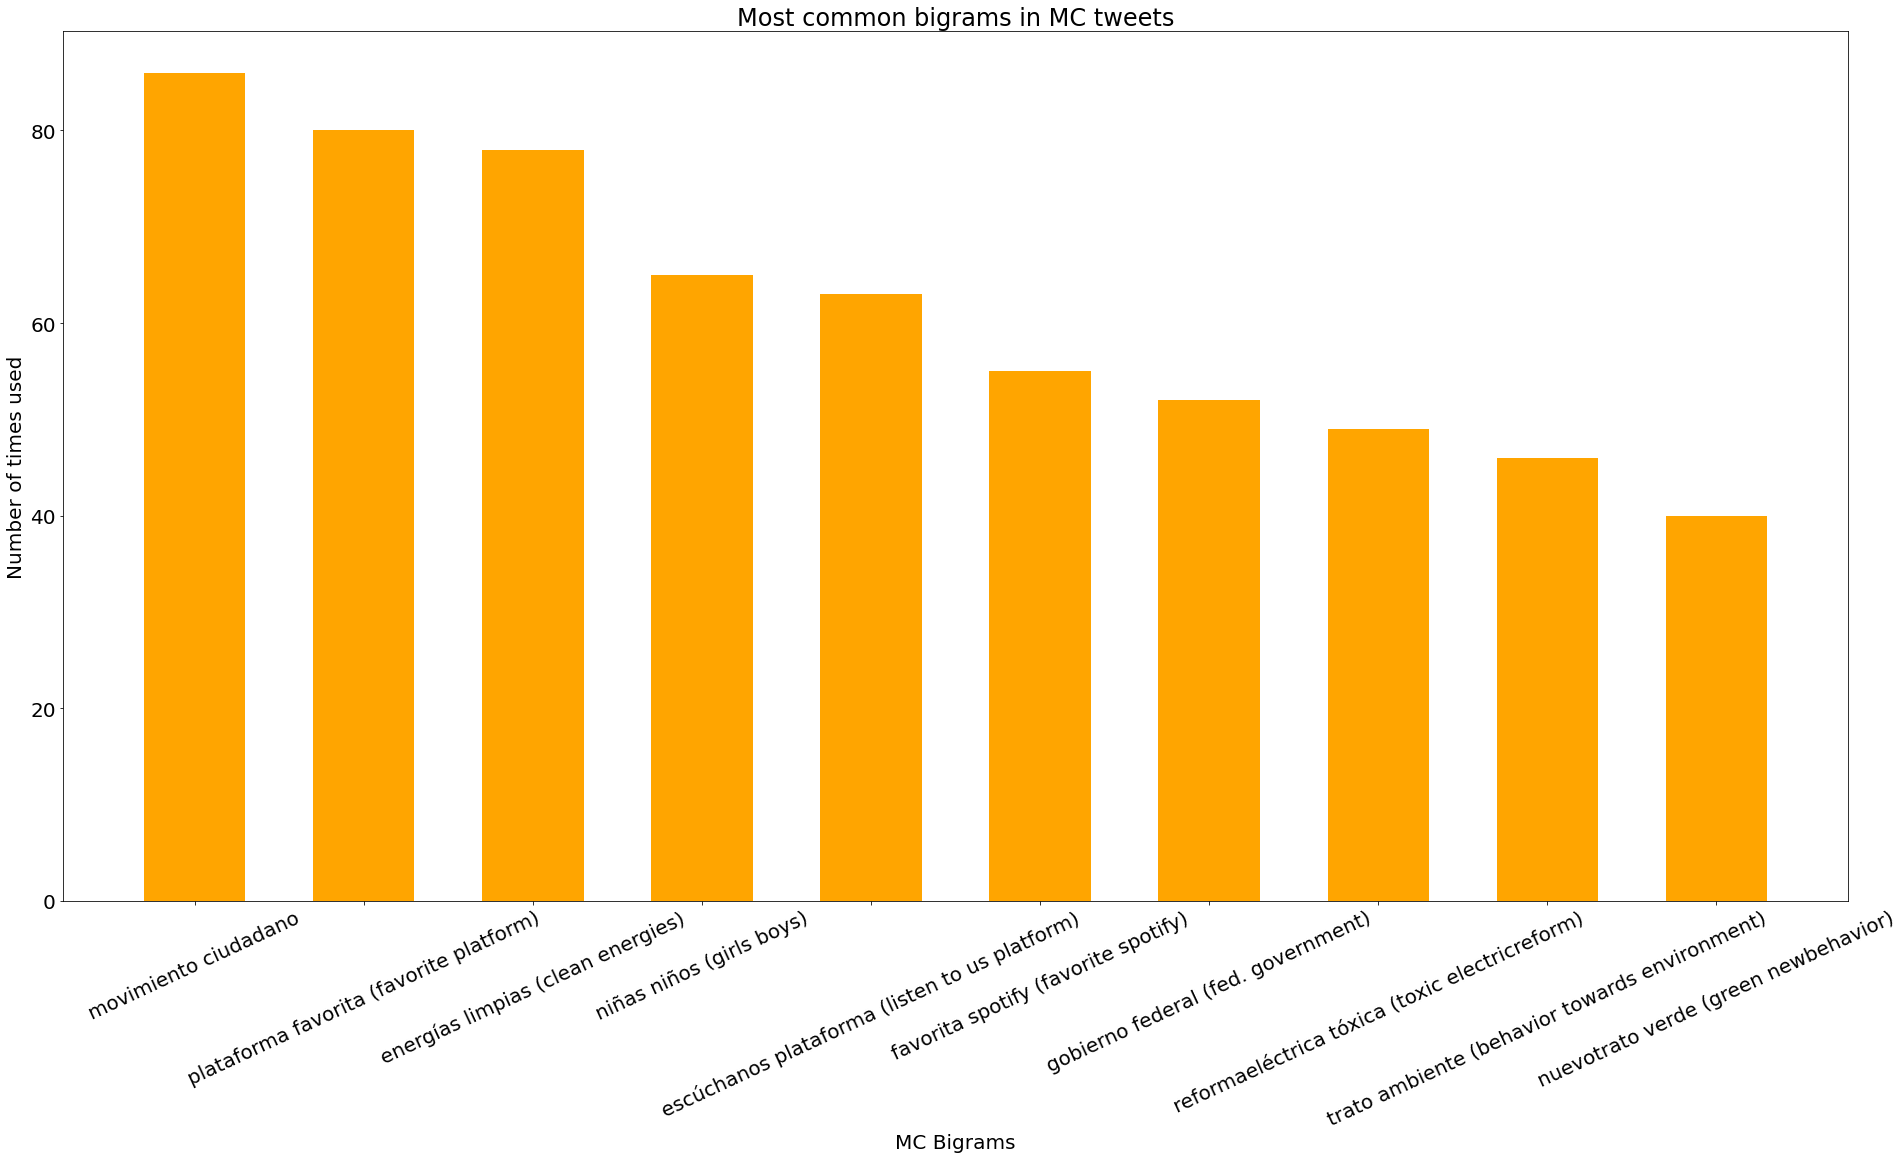

In [56]:
# creating the dataset
data = {'movimiento ciudadano':86, 'plataforma favorita (favorite platform)':80, 'energías limpias (clean energies)':78,
        'niñas niños (girls boys)':65, 'escúchanos plataforma (listen to us platform)':63, 'favorita spotify (favorite spotify)':55, 'gobierno federal (fed. government)':52,
        'reformaeléctrica tóxica (toxic electricreform)':49, 'trato ambiente (behavior towards environment)':46, 'nuevotrato verde (green newbehavior)':40}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='orange',
        width = 0.6)
 
plt.xlabel("MC Bigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common bigrams in MC tweets")
plt.show()

In [42]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common bigrams.

mrn_bi_tweets = cvec_bi.fit_transform(mrn_df['tweet'])

mrn_bi_tweets_df = pd.DataFrame(data=mrn_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

mrn_most_common_bigrams = mrn_bi_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_bigrams

presidente méxico                345
lopezobrador_ presidente         336
22 conferenciapresidente         255
presidente lopezobrador_         243
pueblo democracia                117
compartimos resumen              116
información pueblo               116
resumen conferenciapresidente    116
4t información                   115
democracia transparencia         114
dtype: int64

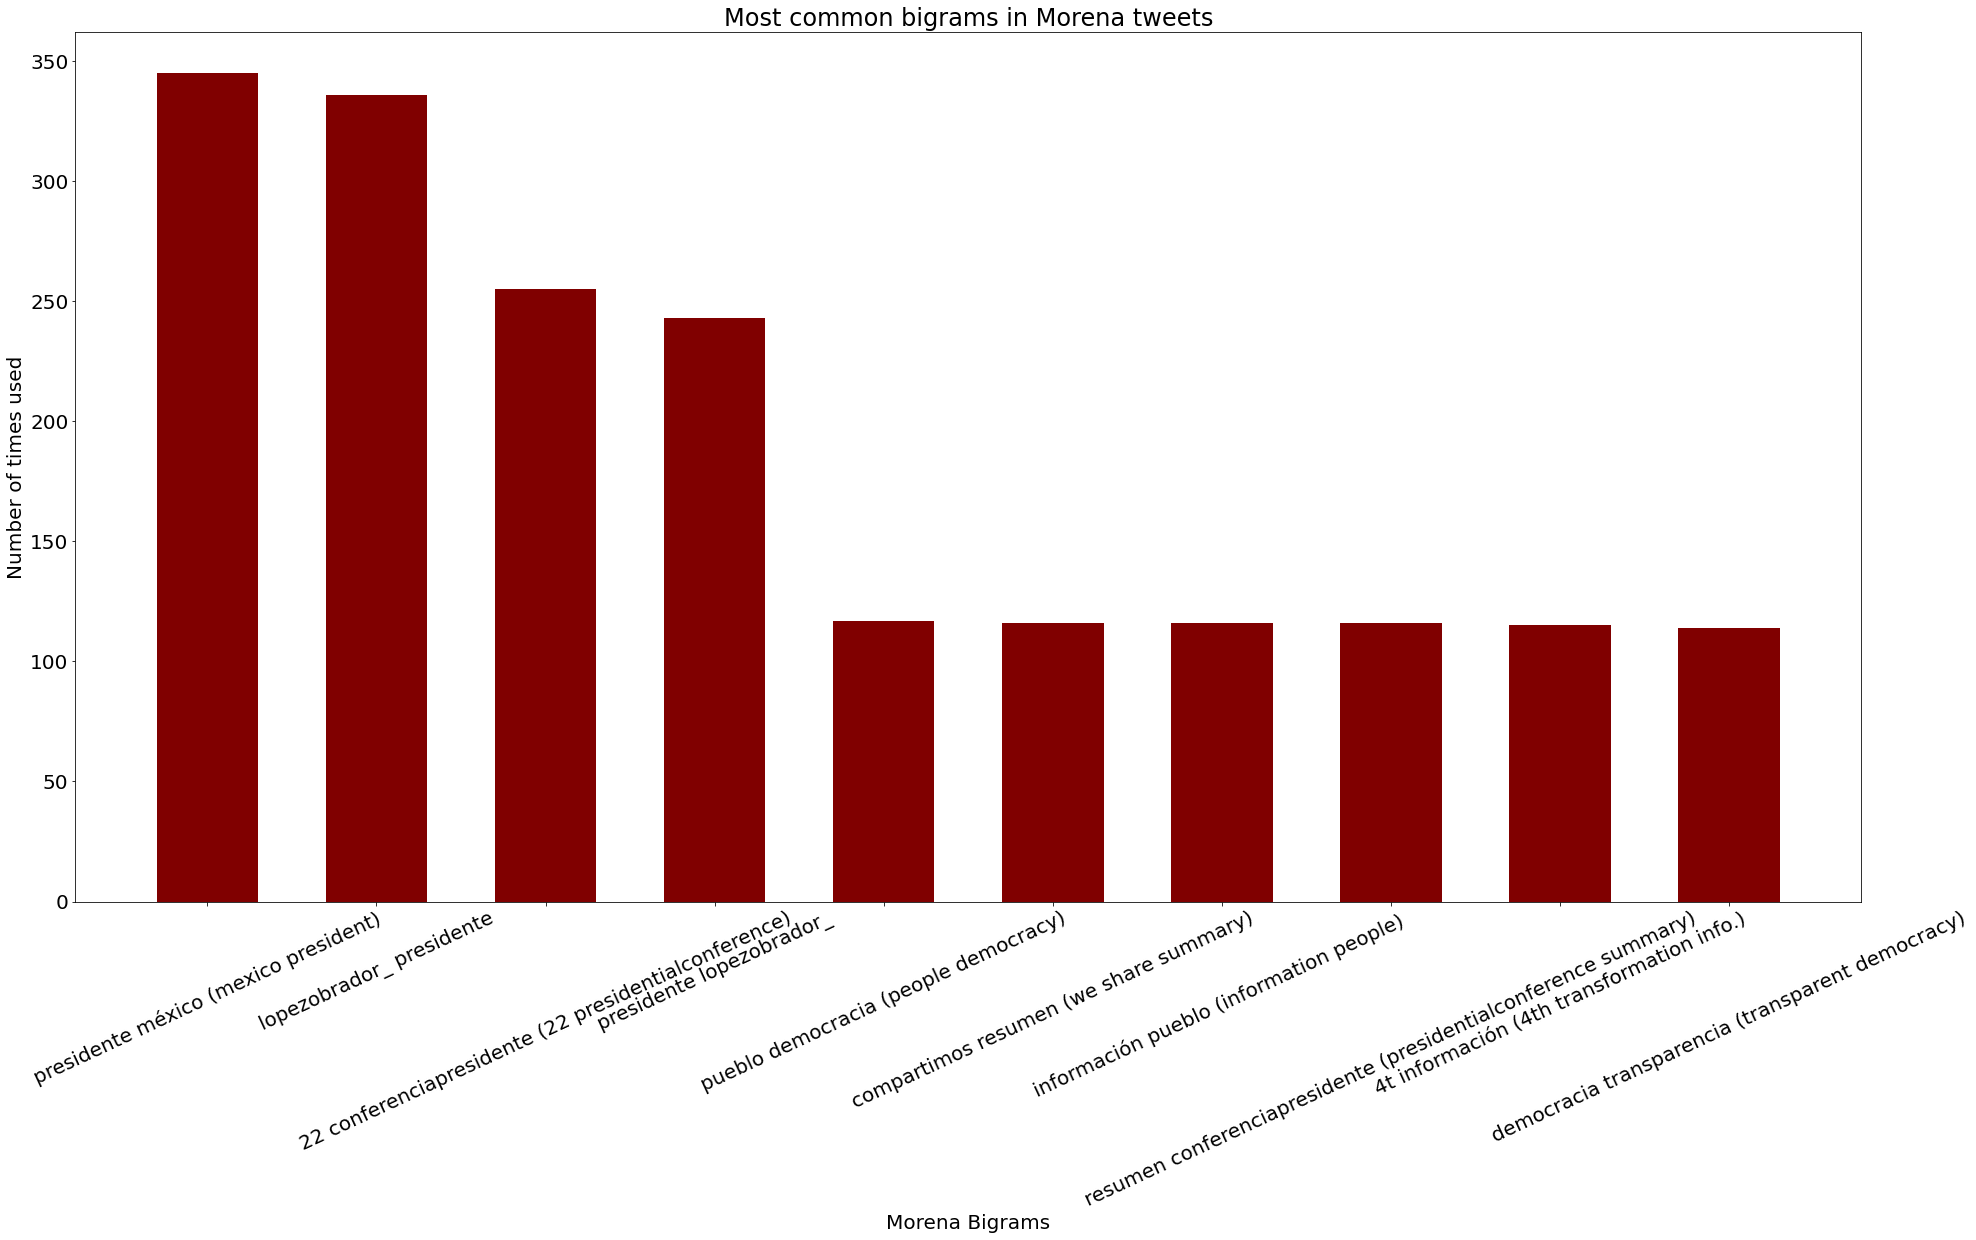

In [57]:
# creating the dataset
data = {'presidente méxico (mexico president)':345, 'lopezobrador_ presidente':336, '22 conferenciapresidente (22 presidentialconference)':255,
        'presidente lopezobrador_':243, 'pueblo democracia (people democracy)':117, 'compartimos resumen (we share summary)':116, 'información pueblo (information people) ':116,
        'resumen conferenciapresidente (presidentialconference summary)':116, '4t información (4th transformation info.)':115, 'democracia transparencia (transparent democracy)':114}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.6)
 
plt.xlabel("Morena Bigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common bigrams in Morena tweets")
plt.show()

### 10 Most Common Trigrams

In [43]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into trigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common trigrams.
cvec_tri = CountVectorizer(ngram_range=(3, 3), stop_words=frozenset(spanish), lowercase=True)

pan_tri_tweets = cvec_tri.fit_transform(pan_df['tweet'])

pan_tri_tweets_df = pd.DataFrame(data=pan_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pan_most_common_trigrams = pan_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_trigrams

familiares seres queridos                 33
lamentamos profundamente fallecimiento    25
queridos descanse paz                     25
seres queridos descanse                   25
san luis potosí                           22
energías limpias renovables               22
cambiar rumbo méxico                      18
sentido pésame familiares                 17
pésame familiares seres                   16
cambiar rumbo país                        16
dtype: int64

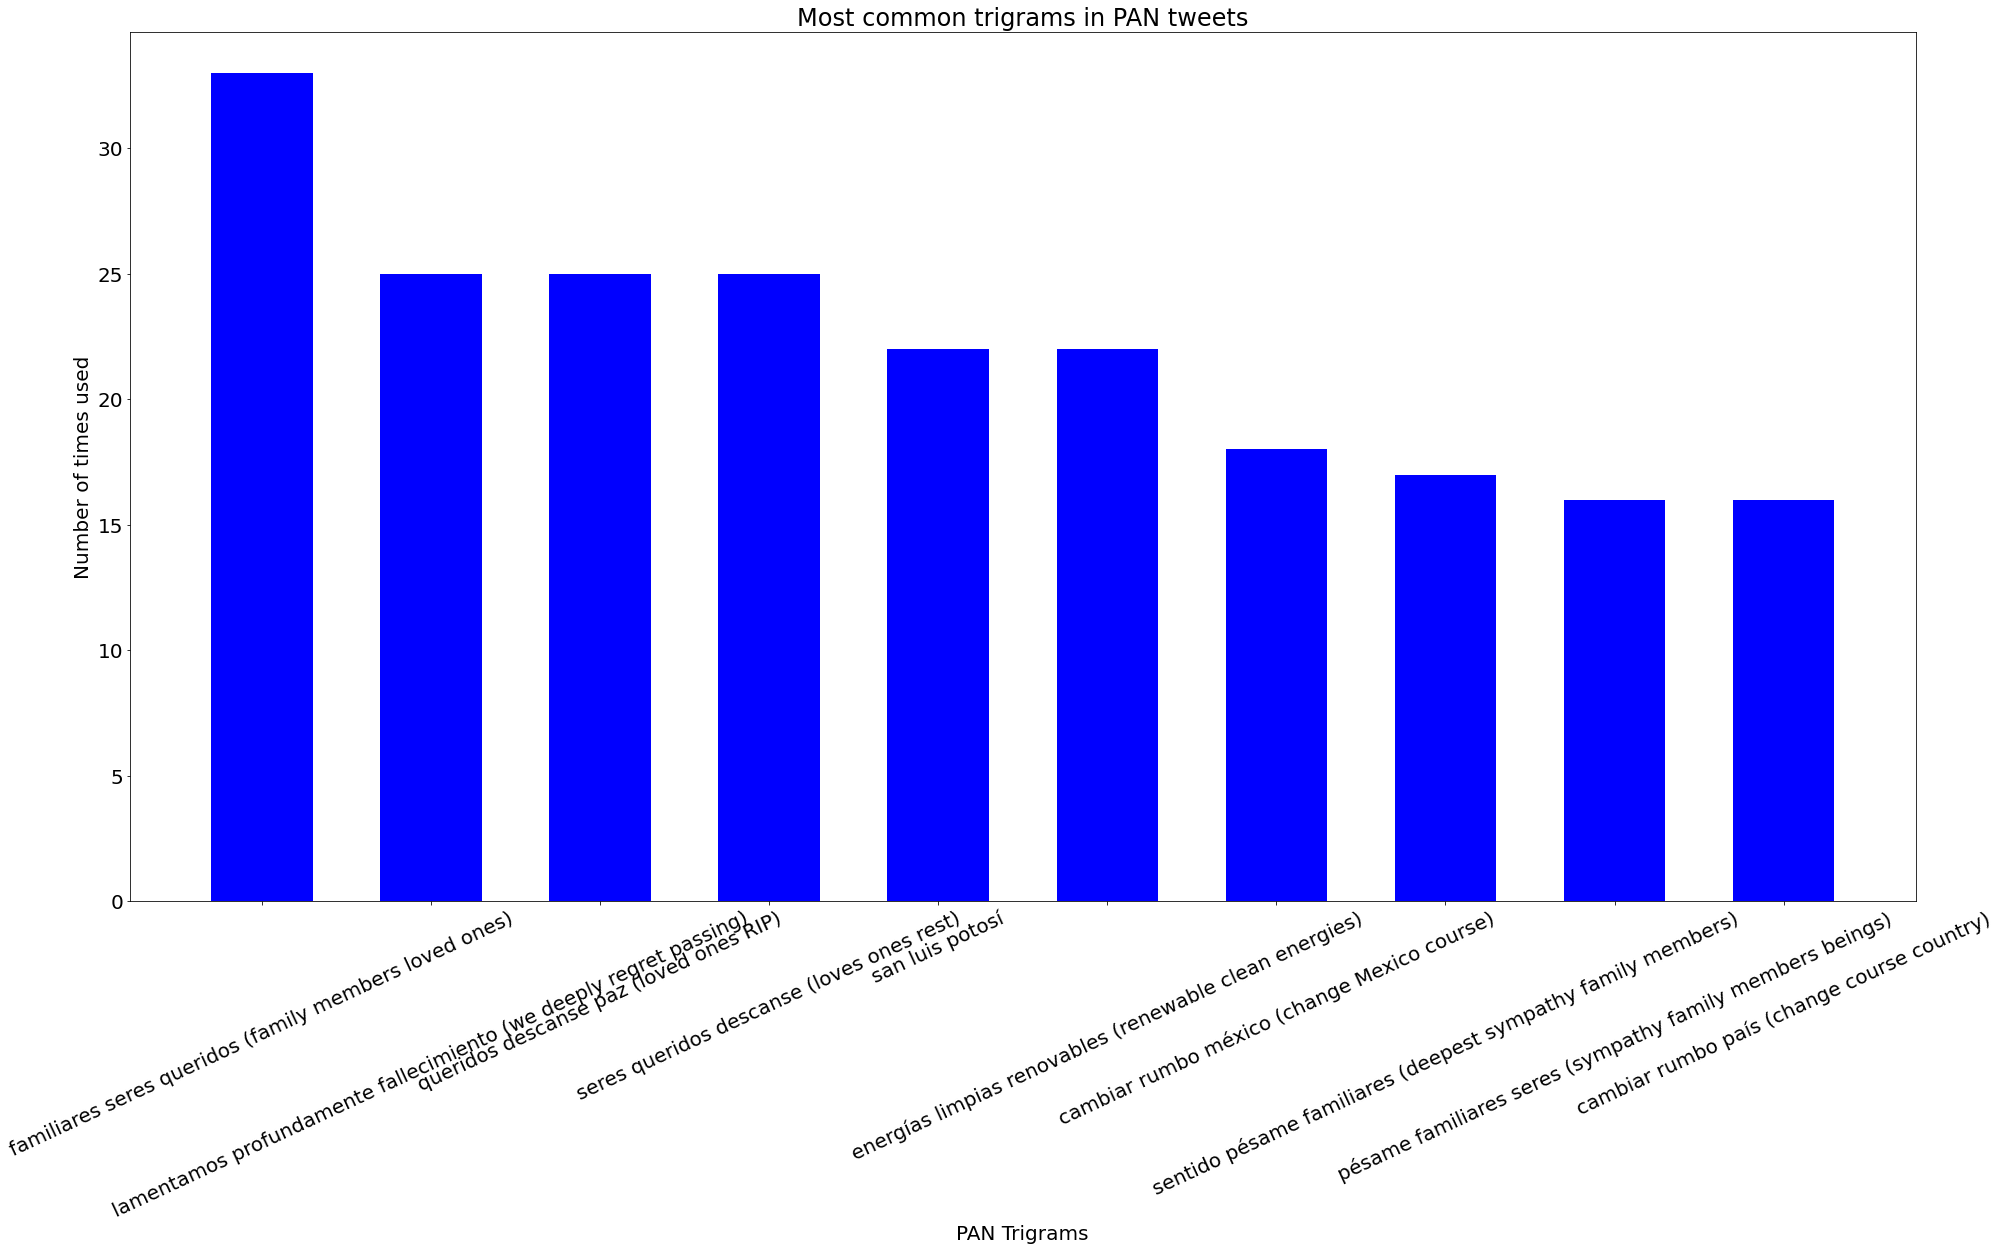

In [58]:
# creating the dataset
data = {'familiares seres queridos (family members loved ones)':33, 'lamentamos profundamente fallecimiento (we deeply regret passing)':25, 'queridos descanse paz (loved ones RIP)':25,
        'seres queridos descanse (loves ones rest)':25, 'san luis potosí':22, 'energías limpias renovables (renewable clean energies)':22, 'cambiar rumbo méxico (change Mexico course)':18,
        'sentido pésame familiares (deepest sympathy family members)':17, 'pésame familiares seres (sympathy family members beings)':16, 'cambiar rumbo país (change course country)':16}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.6)
 
plt.xlabel("PAN Trigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common trigrams in PAN tweets")
plt.show()

In [44]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common trigrams.

pri_tri_tweets = cvec_tri.fit_transform(pri_df['tweet'])

pri_tri_tweets_df = pd.DataFrame(data=pri_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pri_most_common_trigrams = pri_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_trigrams

presidente alitomorenoc reúne           34
alitomorenoc tomó protesta              30
presidente alitomorenoc tomó            29
presidente nacional alitomorenoc        22
presidente alitomorenoc secretaria      20
presidente alitomorenoc sostiene        20
alitomorenoc secretaria caroviggiano    18
presidente alitomorenoc candidato       17
san luis potosí                         16
candidato presidencia municipal         15
dtype: int64

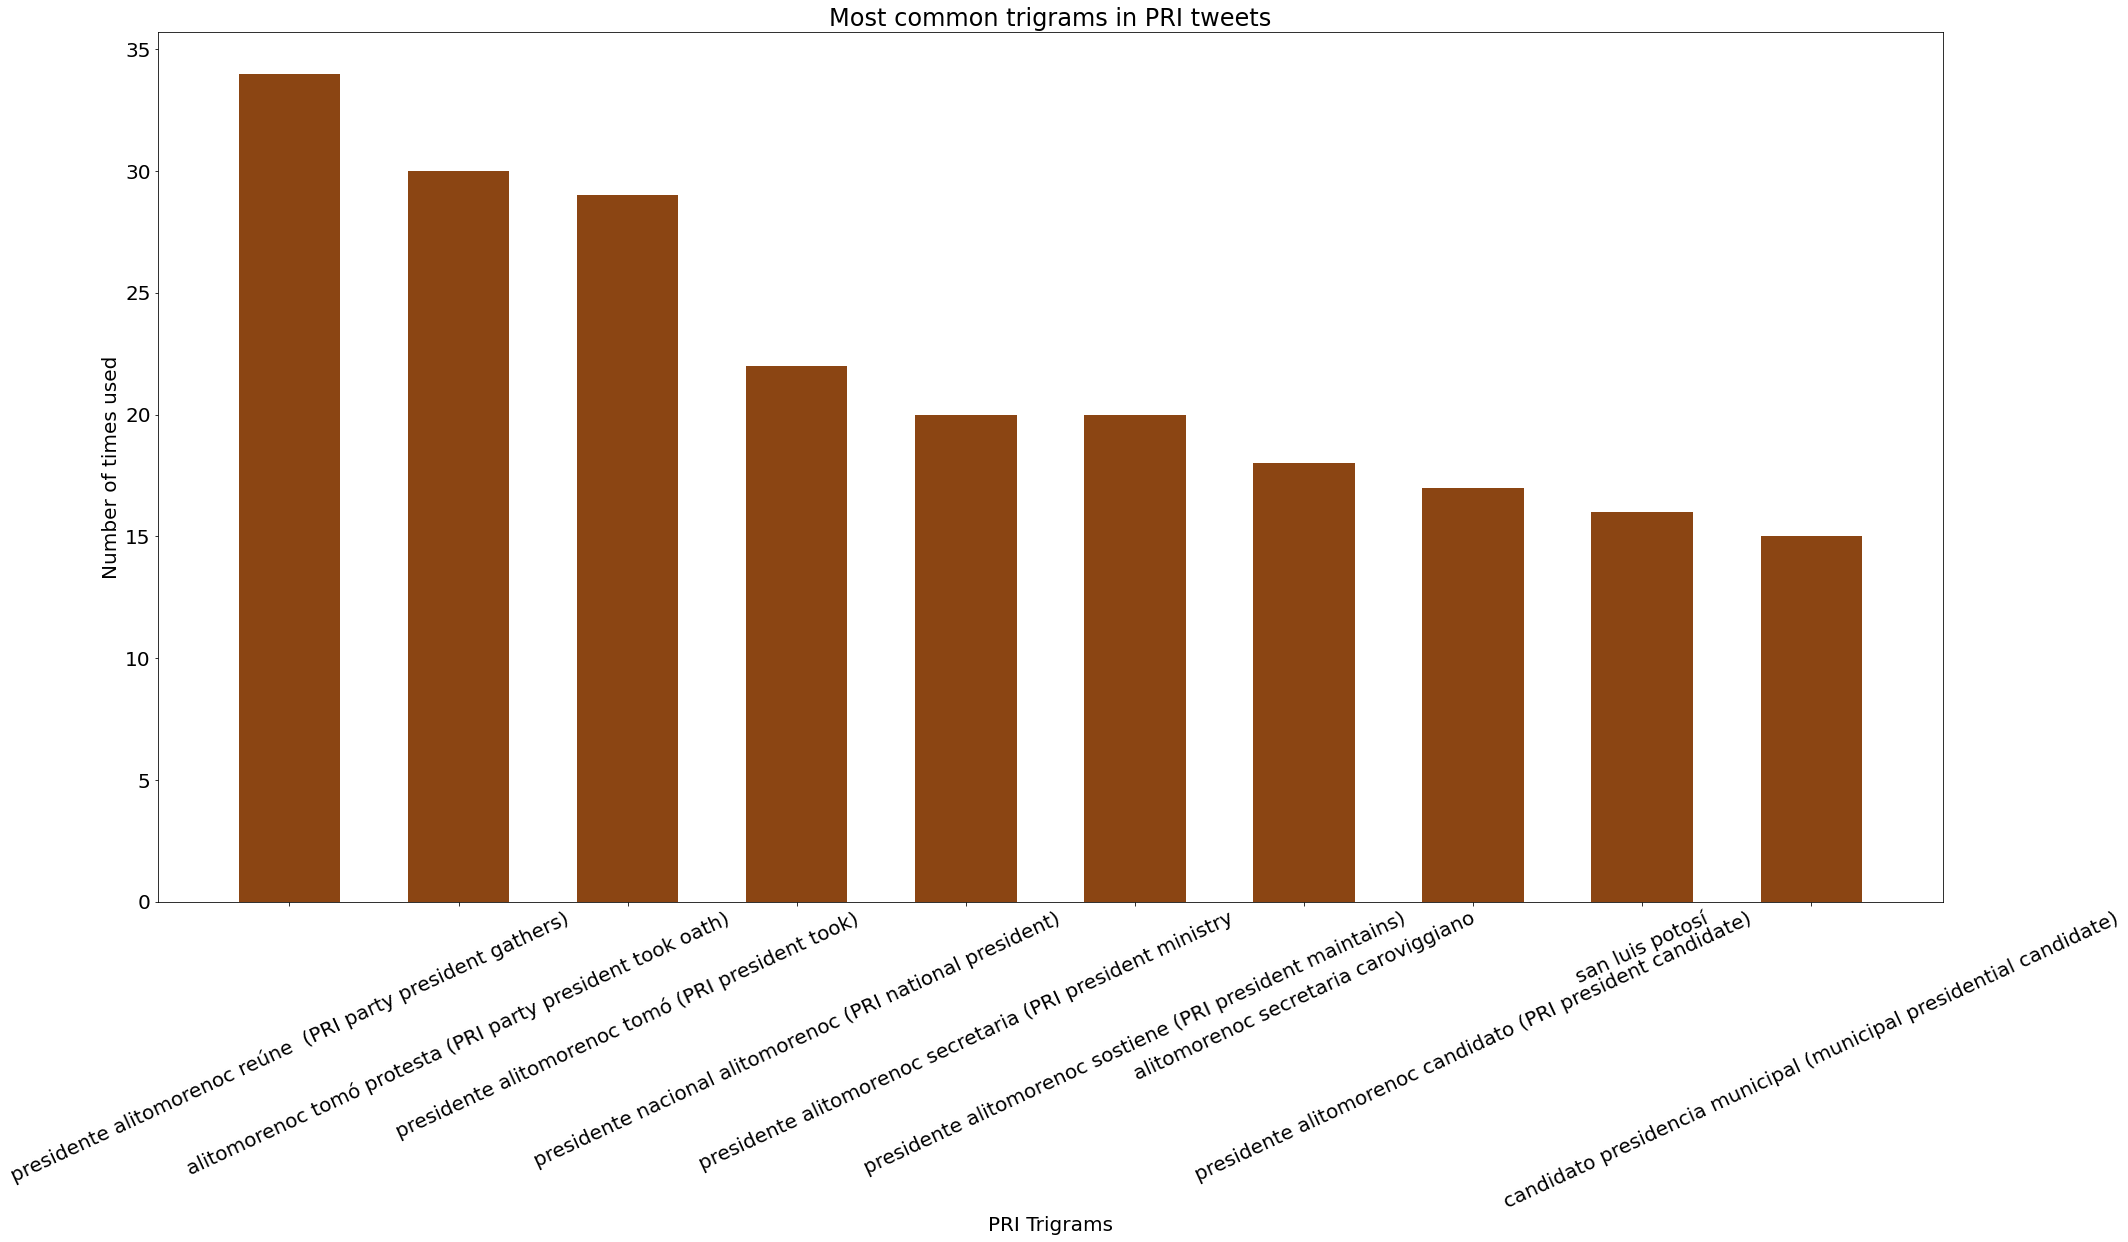

In [115]:
# creating the dataset
data = {'presidente alitomorenoc reúne  (PRI party president gathers)':34, 'alitomorenoc tomó protesta (PRI party president took oath)':30, 'presidente alitomorenoc tomó (PRI president took)':29,
        'presidente nacional alitomorenoc (PRI national president)':22, 'presidente alitomorenoc secretaria (PRI president ministry':20, 'presidente alitomorenoc sostiene (PRI president maintains)':20, 'alitomorenoc secretaria caroviggiano':18,
        'presidente alitomorenoc candidato (PRI president candidate)':17, 'san luis potosí':16, 'candidato presidencia municipal (municipal presidential candidate)':15}
courses = list(data.keys())
values = list(data.values())
  
plt.rc('font', size=20)
fig = plt.figure(figsize = (32, 16))
 
# creating the bar plot
plt.bar(courses, values, color ='saddlebrown',
        width = 0.6)
 
plt.xlabel("PRI Trigrams")
plt.xticks(rotation = 25)
plt.ylabel("Number of times used")
plt.title("Most common trigrams in PRI tweets")
plt.show()

In [45]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common trigrams.

prd_tri_tweets = cvec_tri.fit_transform(prd_df['tweet'])

prd_tri_tweets_df = pd.DataFrame(data=prd_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

prd_most_common_trigrams = prd_tri_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_trigrams

jesus_zambranog link boletín                    36
cara millones estudiantes                       33
delfina gómez dé                                33
dé cara millones                                33
estudiantes niega educación                     33
gómez dé cara                                   33
millones estudiantes niega                      33
niega educación completo                        20
educación completo alimentación                 19
evitar comparezca escuelasdetiempocompletosí    19
dtype: int64

In [46]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common trigrams.

pv_tri_tweets = cvec_tri.fit_transform(pv_df['tweet'])

pv_tri_tweets_df = pd.DataFrame(data=pv_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pv_most_common_trigrams = pv_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_trigrams

motivo cumpleaños sigamos             35
san luis potosí                       33
cumpleaños sigamos trabajando         32
felicitación fuerte abrazo            32
enviamos felicitación fuerte          32
sigamos trabajando méxicoverde        29
trabajando méxicoverde enhorabuena    27
abrazo amigo compañero                21
fuerte abrazo amigo                   21
3delverde cámara diputados            18
dtype: int64

In [47]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common trigrams.

mc_tri_tweets = cvec_tri.fit_transform(mc_df['tweet'])

mc_tri_tweets_df = pd.DataFrame(data=mc_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

mc_most_common_trigrams = mc_tri_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_trigrams

escúchanos plataforma favorita        63
plataforma favorita spotify           55
energías limpias baratas              26
na na na                              22
evoluciónmexicana nuevotrato verde    17
darle trato ambiente                  17
centro causas frente                  17
personas centro causas                16
foro evoluciónmexicana nuevotrato     15
transitar energías limpias            14
dtype: int64

In [48]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common trigrams.

mrn_tri_tweets = cvec_tri.fit_transform(mrn_df['tweet'])

mrn_tri_tweets_df = pd.DataFrame(data=mrn_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

mrn_most_common_trigrams = mrn_tri_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_trigrams

lopezobrador_ presidente méxico              335
compartimos resumen conferenciapresidente    116
4t información pueblo                        115
pueblo democracia transparencia              113
información pueblo democracia                113
conferenciapresidente 4t información         106
resumen conferenciapresidente 4t             106
02 22 conferenciapresidente                   85
03 22 conferenciapresidente                   81
01 22 conferenciapresidente                   70
dtype: int64

### 10 Most Common 4-grams

In [49]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into 4-grams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common 4-grams.
cvec_quad = CountVectorizer(ngram_range=(4, 4), stop_words=frozenset(spanish), lowercase=True)

pan_quad_tweets = cvec_quad.fit_transform(pan_df['tweet'])

pan_quad_tweets_df = pd.DataFrame(data=pan_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

pan_most_common_quadgrams = pan_quad_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_quadgrams

seres queridos descanse paz                 25
familiares seres queridos descanse          21
pésame familiares seres queridos            16
sentido pésame familiares seres             16
condolencias familiares seres queridos      15
sinceras condolencias familiares seres      10
evolucionar dejar energías contaminantes     7
narrativa propuesta acción nacional          6
ciclo conferencias narrativa propuesta       6
dejar energías contaminantes motivar         6
dtype: int64

In [50]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common 4-grams.

pri_quad_tweets = cvec_quad.fit_transform(pri_df['tweet'])

pri_quad_tweets_df = pd.DataFrame(data=pri_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

pri_most_common_quadgrams = pri_quad_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_quadgrams

presidente alitomorenoc tomó protesta              29
presidente alitomorenoc secretaria caroviggiano    18
acceso universal medicamentos gratuitos            12
ley acceso universal medicamentos                  12
diputadas diputados locales electos                10
próxima legislatura cámara diputados               10
únete pri vz5yl9tbrh sebuscanrevolucionarios        9
presidente alitomorenoc candidata gubernatura       9
presidente alitomorenoc candidato gubernatura       8
presidente alitomorenoc sostiene reunión            8
dtype: int64

In [51]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common 4-grams.

prd_quad_tweets = cvec_quad.fit_transform(prd_df['tweet'])

prd_quad_tweets_df = pd.DataFrame(data=prd_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

prd_most_common_quadgrams = prd_quad_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_quadgrams

millones estudiantes niega educación                         33
gómez dé cara millones                                       33
cara millones estudiantes niega                              33
dé cara millones estudiantes                                 33
delfina gómez dé cara                                        33
completo alimentación evitar comparezca                      19
alimentación evitar comparezca escuelasdetiempocompletosí    19
estudiantes niega educación completo                         19
niega educación completo alimentación                        19
educación completo alimentación evitar                       19
dtype: int64

In [52]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common 4-grams.

pv_quad_tweets = cvec_quad.fit_transform(pv_df['tweet'])

pv_quad_tweets_df = pd.DataFrame(data=pv_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

pv_most_common_quadgrams = pv_quad_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_quadgrams

enviamos felicitación fuerte abrazo                    32
motivo cumpleaños sigamos trabajando                   32
cumpleaños sigamos trabajando méxicoverde              28
sigamos trabajando méxicoverde enhorabuena             27
felicitación fuerte abrazo amigo                       21
fuerte abrazo amigo compañero                          21
lodestacadodelasemana 3delverde cámara diputados       17
conoce lodestacadodelasemana 3delverde cámara          17
contagio masivo covid 19                               17
3delverde senado lodestacadodelasemana legisladores    15
dtype: int64

In [53]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common 4-grams.

mc_quad_tweets = cvec_quad.fit_transform(mc_df['tweet'])

mc_quad_tweets_df = pd.DataFrame(data=mc_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

mc_most_common_quadgrams = mc_quad_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_quadgrams

escúchanos plataforma favorita spotify      42
personas centro causas frente               16
foro evoluciónmexicana nuevotrato verde     15
josé luis rodríguez zapatero                14
na na na na                                 14
pablo_vah escúchanos plataforma favorita    11
escúchanos plataforma favorita amazon       11
escúchanos plataforma favorita google       10
ley movilidad seguridad vial                 8
delriovirgen1 preso político gobernador      8
dtype: int64

In [54]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common 4-grams.

mrn_quad_tweets = cvec_quad.fit_transform(mrn_df['tweet'])

mrn_quad_tweets_df = pd.DataFrame(data=mrn_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

mrn_most_common_quadgrams = mrn_quad_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_quadgrams

información pueblo democracia transparencia              113
4t información pueblo democracia                         113
resumen conferenciapresidente 4t información             106
compartimos resumen conferenciapresidente 4t             106
conferenciapresidente 4t información pueblo              106
mario_delgado presidente nacional morena                  44
lopezobrador_ presidente méxico conferenciapresidente     36
lopezobrador_ presidente méxico 01                        29
presidente méxico 01 22                                   20
méxico 01 22 conferenciapresidente                        20
dtype: int64

### 10 Most Common 5-grams

In [55]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into 5-grams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common 5-grams.
cvec_quint = CountVectorizer(ngram_range=(5, 5), stop_words=frozenset(spanish), lowercase=True)

pan_quint_tweets = cvec_quint.fit_transform(pan_df['tweet'])

pan_quint_tweets_df = pd.DataFrame(data=pan_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

pan_most_common_quintgrams = pan_quint_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_quintgrams

familiares seres queridos descanse paz                        21
sentido pésame familiares seres queridos                      16
pésame familiares seres queridos descanse                     11
condolencias familiares seres queridos descanse               10
sinceras condolencias familiares seres queridos               10
revistalanacion presentamos número encontrarás información     6
evolucionar dejar energías contaminantes motivar               6
conferencias narrativa propuesta acción nacional               6
tiempos evolucionar dejar energías contaminantes               6
ciclo conferencias narrativa propuesta acción                  6
dtype: int64

In [56]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common 5-grams.

pri_quint_tweets = cvec_quint.fit_transform(pri_df['tweet'])

pri_quint_tweets_df = pd.DataFrame(data=pri_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

pri_most_common_quintgrams = pri_quint_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_quintgrams

ley acceso universal medicamentos gratuitos                   12
presidente alitomorenoc secretaria caroviggiano encuentran     6
solidaridad momentos difíciles descanse paz                    5
registro público nacional agresores sexuales                   5
presidente alitomorenoc sostiene importante encuentro          5
presidente alitomorenoc candidato presidencia municipal        5
unimos pena embarga familiares amigos                          5
candidata gubernatura quintana roo hendricksles                4
alitomorenoc candidato gubernatura sonora egandarac            4
junio vota candidatas candidatos pri                           4
dtype: int64

In [57]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common 5-grams.

prd_quint_tweets = cvec_quint.fit_transform(prd_df['tweet'])

prd_quint_tweets_df = pd.DataFrame(data=prd_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

prd_most_common_quintgrams = prd_quint_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_quintgrams

delfina gómez dé cara millones                                        33
gómez dé cara millones estudiantes                                    33
cara millones estudiantes niega educación                             33
dé cara millones estudiantes niega                                    33
estudiantes niega educación completo alimentación                     19
millones estudiantes niega educación completo                         19
niega educación completo alimentación evitar                          19
educación completo alimentación evitar comparezca                     19
completo alimentación evitar comparezca escuelasdetiempocompletosí    19
porqué exigimos programa escuelasdetiempocompleto desaparezca         17
dtype: int64

In [58]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common 5-grams.

pv_quint_tweets = cvec_quint.fit_transform(pv_df['tweet'])

pv_quint_tweets_df = pd.DataFrame(data=pv_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

pv_most_common_quintgrams = pv_quint_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_quintgrams

motivo cumpleaños sigamos trabajando méxicoverde           28
cumpleaños sigamos trabajando méxicoverde enhorabuena      27
enviamos felicitación fuerte abrazo amigo                  21
felicitación fuerte abrazo amigo compañero                 21
conoce lodestacadodelasemana 3delverde cámara diputados    17
celebramos basurachallenge únete vecinos localidad         10
limpia espacio público unidos méxicoverde                  10
localidad limpia espacio público unidos                    10
basurachallenge únete vecinos localidad limpia             10
únete vecinos localidad limpia espacio                     10
dtype: int64

In [59]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common 5-grams.

mc_quint_tweets = cvec_quint.fit_transform(mc_df['tweet'])

mc_quint_tweets_df = pd.DataFrame(data=mc_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

mc_most_common_quintgrams = mc_quint_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_quintgrams

pablo_vah escúchanos plataforma favorita spotify          9
na na na na na                                            7
preso político gobernador morenista veracruz              5
nacional militantes simpatizantes movimiento ciudadano    5
asamblea nacional militantes simpatizantes movimiento     5
hrapcwgcpo google vzuuijuczy amazon yvjjz9okik            5
xpxmqqniko apple ykhsqpksr6 amazon 1au630xsfb             5
google xpxmqqniko apple ykhsqpksr6 amazon                 5
google vzuuijuczy amazon yvjjz9okik apple                 5
vzuuijuczy amazon yvjjz9okik apple 3rnejpqhaq             5
dtype: int64

In [60]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common 5-grams.

mrn_quint_tweets = cvec_quint.fit_transform(mrn_df['tweet'])

mrn_quint_tweets_df = pd.DataFrame(data=mrn_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

mrn_most_common_quintgrams = mrn_quint_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_quintgrams

4t información pueblo democracia transparencia                       113
conferenciapresidente 4t información pueblo democracia               106
compartimos resumen conferenciapresidente 4t información             106
resumen conferenciapresidente 4t información pueblo                  106
lopezobrador_ presidente méxico 01 22                                 20
presidente méxico 01 22 conferenciapresidente                         20
conferencia prensa matutina palacio nacional                          16
comparte difunde voz movimiento morenanoticias                        13
mensajealpueblo 3añosdetransformación 01 12 21                        13
presidente lopezobrador_ mensajealpueblo 3añosdetransformación 01     12
dtype: int64

## N-grams Without Party and Politican Names

### 10 Most Common Unigrams Without Party and Politician Names

In [61]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into unigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common unigrams.
cvec_uni = CountVectorizer(ngram_range=(1, 1), stop_words=frozenset(spanish_politics), lowercase=True)

pan_uni_tweets = cvec_uni.fit_transform(pan_df['tweet'])

pan_uni_tweets_df = pd.DataFrame(data=pan_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pan_most_common_unigrams = pan_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_unigrams

méxico          502
gobierno        399
familias        322
país            280
junio           190
salud           160
diputadospan    159
resultados      156
mexicanos       146
rumbo           142
dtype: int64

In [62]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common unigrams.

pri_uni_tweets = cvec_uni.fit_transform(pri_df['tweet'])

pri_uni_tweets_df = pd.DataFrame(data=pri_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pri_most_common_unigrams = pri_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_unigrams

méxico        574
familias      294
junio         286
mujeres       280
ganar         235
mexicanos     221
gobierno      216
país          213
resultados    194
propuestas    178
dtype: int64

In [63]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common unigrams.

prd_uni_tweets = cvec_uni.fit_transform(prd_df['tweet'])

prd_uni_tweets_df = pd.DataFrame(data=prd_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

prd_most_common_unigrams = prd_uni_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_unigrams

méxico                      397
gobierno                    211
mujeres                     183
evillegasv                  130
junio                       130
somosprd                    129
educación                   129
escuelasdetiempocompleto    127
futuro                      127
violencia                   117
dtype: int64

In [64]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common unigrams.

pv_uni_tweets = cvec_uni.fit_transform(pv_df['tweet'])

pv_uni_tweets_df = pd.DataFrame(data=pv_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

pv_most_common_unigrams = pv_uni_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_unigrams

país              311
méxico            259
ambiente          245
salud             182
méxicoverde       168
méxicounido       155
covid19           140
mexicanos         129
vida              117
verdesenadomex    114
dtype: int64

In [65]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common unigrams.

mc_uni_tweets = cvec_uni.fit_transform(mc_df['tweet'])

mc_uni_tweets_df = pd.DataFrame(data=mc_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

mc_most_common_unigrams = mc_uni_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_unigrams

futuro                  307
gobierno                227
méxico                  215
delríopresopolítico     175
mujeres                 159
palabrasenmovimiento    155
país                    144
ambiente                131
derechos                121
personas                118
dtype: int64

In [66]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common unigrams.

mrn_uni_tweets = cvec_uni.fit_transform(mrn_df['tweet'])

mrn_uni_tweets_df = pd.DataFrame(data=mrn_uni_tweets.A, columns=cvec_uni.get_feature_names_out())

mrn_most_common_unigrams = mrn_uni_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_unigrams

pueblo            749
méxico            748
4t                411
transformación    267
democracia        240
país              218
francamente       197
gobierno          185
esperanza         167
compartimos       162
dtype: int64

### 10 Most Common Bigrams Without Party and Politician Names

In [67]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into bigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common bigrams.
cvec_bi = CountVectorizer(ngram_range=(2, 2), stop_words=frozenset(spanish_politics), lowercase=True)

pan_bi_tweets = cvec_bi.fit_transform(pan_df['tweet'])

pan_bi_tweets_df = pd.DataFrame(data=pan_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pan_most_common_bigrams = pan_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_bigrams

gobierno federal      82
familias mexicanas    72
energías limpias      70
descanse paz          53
cambiar rumbo         43
seres queridos        42
cámara diputados      42
rumbo méxico          40
méxico necesita       39
rumbo país            37
dtype: int64

In [68]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common bigrams.

pri_bi_tweets = cvec_bi.fit_transform(pri_df['tweet'])

pri_bi_tweets_df = pd.DataFrame(data=pri_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pri_most_common_bigrams = pri_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_bigrams

cámara diputados         59
diputados federales      55
mujeres hombres          52
candidatas candidatos    51
familias mexicanas       51
ganar junio              48
invitamos seguir         39
diputadas diputados      39
junio vota               37
gobierno federal         36
dtype: int64

In [69]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common bigrams.

prd_bi_tweets = cvec_bi.fit_transform(prd_df['tweet'])

prd_bi_tweets_df = pd.DataFrame(data=prd_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

prd_most_common_bigrams = prd_bi_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_bigrams

gobierno federal                     75
link boletín                         60
niñas niños                          53
delfina gómez                        52
juntas juntos                        42
33 años                              37
niega educación                      34
millones estudiantes                 34
programa escuelasdetiempocompleto    33
gómez dé                             33
dtype: int64

In [70]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common bigrams.

pv_bi_tweets = cvec_bi.fit_transform(pv_df['tweet'])

pv_bi_tweets_df = pd.DataFrame(data=pv_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

pv_most_common_bigrams = pv_bi_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_bigrams

covid 19                 75
enviamos felicitación    43
motivo cumpleaños        42
pequeñas acciones        36
cumpleaños sigamos       35
san luis                 34
contagios covid19        34
fuerte abrazo            33
luis potosí              33
sigamos trabajando       33
dtype: int64

In [71]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common bigrams.

mc_bi_tweets = cvec_bi.fit_transform(mc_df['tweet'])

mc_bi_tweets_df = pd.DataFrame(data=mc_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

mc_most_common_bigrams = mc_bi_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_bigrams

plataforma favorita           80
energías limpias              78
niñas niños                   65
escúchanos plataforma         63
favorita spotify              55
gobierno federal              52
reformaeléctrica tóxica       49
trato ambiente                46
andamosbienpuestxs regular    38
comisión permanente           32
dtype: int64

In [72]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common bigrams.

mrn_bi_tweets = cvec_bi.fit_transform(mrn_df['tweet'])

mrn_bi_tweets_df = pd.DataFrame(data=mrn_bi_tweets.A, columns=cvec_bi.get_feature_names_out())

mrn_most_common_bigrams = mrn_bi_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_bigrams

pueblo democracia           117
compartimos resumen         116
información pueblo          116
4t información              115
democracia transparencia    114
resumen 4t                  106
pueblo méxico               104
imagen circulaenredes       104
12 21                        83
lópez obrador                79
dtype: int64

### 10 Most Common Trigrams Without Party and Politican Names

In [73]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into trigrams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common trigrams.
cvec_tri = CountVectorizer(ngram_range=(3, 3), stop_words=frozenset(spanish_politics), lowercase=True)

pan_tri_tweets = cvec_tri.fit_transform(pan_df['tweet'])

pan_tri_tweets_df = pd.DataFrame(data=pan_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pan_most_common_trigrams = pan_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_trigrams

familiares seres queridos                 33
seres queridos descanse                   25
queridos descanse paz                     25
lamentamos profundamente fallecimiento    25
san luis potosí                           22
energías limpias renovables               22
cambiar rumbo méxico                      18
sentido pésame familiares                 17
pésame familiares seres                   16
cambiar rumbo país                        16
dtype: int64

In [74]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common trigrams.

pri_tri_tweets = cvec_tri.fit_transform(pri_df['tweet'])

pri_tri_tweets_df = pd.DataFrame(data=pri_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pri_most_common_trigrams = pri_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_trigrams

san luis potosí                     16
recuperar rumbo país                15
candidato presidencia municipal     15
mujeres hombres comprometidos       13
diputados locales electos           13
diputadas diputados locales         13
acceso universal medicamentos       12
universal medicamentos gratuitos    12
diputadas diputados federales       12
ley acceso universal                12
dtype: int64

In [75]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common trigrams.

prd_tri_tweets = cvec_tri.fit_transform(prd_df['tweet'])

prd_tri_tweets_df = pd.DataFrame(data=prd_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

prd_most_common_trigrams = prd_tri_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_trigrams

dé cara millones                                33
estudiantes niega educación                     33
cara millones estudiantes                       33
gómez dé cara                                   33
millones estudiantes niega                      33
delfina gómez dé                                33
niega educación completo                        20
completo alimentación evitar                    19
alimentación evitar comparezca                  19
evitar comparezca escuelasdetiempocompletosí    19
dtype: int64

In [76]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common trigrams.

pv_tri_tweets = cvec_tri.fit_transform(pv_df['tweet'])

pv_tri_tweets_df = pd.DataFrame(data=pv_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

pv_most_common_trigrams = pv_tri_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_trigrams

motivo cumpleaños sigamos             35
san luis potosí                       33
cumpleaños sigamos trabajando         32
felicitación fuerte abrazo            32
enviamos felicitación fuerte          32
sigamos trabajando méxicoverde        29
trabajando méxicoverde enhorabuena    27
abrazo amigo compañero                21
fuerte abrazo amigo                   21
3delverde cámara diputados            18
dtype: int64

In [77]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common trigrams.

mc_tri_tweets = cvec_tri.fit_transform(mc_df['tweet'])

mc_tri_tweets_df = pd.DataFrame(data=mc_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

mc_most_common_trigrams = mc_tri_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_trigrams

escúchanos plataforma favorita       63
plataforma favorita spotify          55
energías limpias baratas             26
na na na                             22
darle trato ambiente                 17
centro causas frente                 17
personas centro causas               16
foro evoluciónmexicana nuevotrato    15
luis rodríguez zapatero              14
transitar energías limpias           14
dtype: int64

In [78]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common trigrams.

mrn_tri_tweets = cvec_tri.fit_transform(mrn_df['tweet'])

mrn_tri_tweets_df = pd.DataFrame(data=mrn_tri_tweets.A, columns=cvec_tri.get_feature_names_out())

mrn_most_common_trigrams = mrn_tri_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_trigrams

4t información pueblo                        115
información pueblo democracia                113
pueblo democracia transparencia              113
compartimos resumen 4t                       106
resumen 4t información                       106
amor amor paga                                34
conferencia prensa matutina                   24
soberanía energética lareformaeléctricava     22
01 12 21                                      21
comparte difunde voz                          20
dtype: int64

### 10 Most Common 4-grams Without Party and Politican Names

In [79]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into 4-grams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common 4-grams.
cvec_quad = CountVectorizer(ngram_range=(4, 4), stop_words=frozenset(spanish_politics), lowercase=True)

pan_quad_tweets = cvec_quad.fit_transform(pan_df['tweet'])

pan_quad_tweets_df = pd.DataFrame(data=pan_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

pan_most_common_quadgrams = pan_quad_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_quadgrams

seres queridos descanse paz                 25
familiares seres queridos descanse          21
sentido pésame familiares seres             16
pésame familiares seres queridos            16
condolencias familiares seres queridos      15
sinceras condolencias familiares seres      10
evolucionar dejar energías contaminantes     7
mil muertes covid 19                         6
ciclo conferencias narrativa propuesta       6
motivar energías limpias renovables          6
dtype: int64

In [80]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common 4-grams.

pri_quad_tweets = cvec_quad.fit_transform(pri_df['tweet'])

pri_quad_tweets_df = pd.DataFrame(data=pri_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

pri_most_common_quadgrams = pri_quad_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_quadgrams

ley acceso universal medicamentos                  12
acceso universal medicamentos gratuitos            12
próxima legislatura cámara diputados               10
diputadas diputados locales electos                10
junio vota candidatas candidatos                    7
debate candidatas candidatos gubernatura            7
momentos difíciles descanse paz                     7
18 00 conferencia magistral                         6
lamentamos profundamente sensible fallecimiento     6
invitamos seguir conferencia magistral              6
dtype: int64

In [81]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common 4-grams.

prd_quad_tweets = cvec_quad.fit_transform(prd_df['tweet'])

prd_quad_tweets_df = pd.DataFrame(data=prd_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

prd_most_common_quadgrams = prd_quad_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_quadgrams

dé cara millones estudiantes                                 33
millones estudiantes niega educación                         33
gómez dé cara millones                                       33
delfina gómez dé cara                                        33
cara millones estudiantes niega                              33
completo alimentación evitar comparezca                      19
niega educación completo alimentación                        19
estudiantes niega educación completo                         19
alimentación evitar comparezca escuelasdetiempocompletosí    19
educación completo alimentación evitar                       19
dtype: int64

In [82]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common 4-grams.

pv_quad_tweets = cvec_quad.fit_transform(pv_df['tweet'])

pv_quad_tweets_df = pd.DataFrame(data=pv_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

pv_most_common_quadgrams = pv_quad_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_quadgrams

motivo cumpleaños sigamos trabajando                   32
enviamos felicitación fuerte abrazo                    32
cumpleaños sigamos trabajando méxicoverde              28
sigamos trabajando méxicoverde enhorabuena             27
fuerte abrazo amigo compañero                          21
felicitación fuerte abrazo amigo                       21
contagio masivo covid 19                               17
lodestacadodelasemana 3delverde cámara diputados       17
conoce lodestacadodelasemana 3delverde cámara          17
3delverde senado lodestacadodelasemana legisladores    15
dtype: int64

In [83]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common 4-grams.

mc_quad_tweets = cvec_quad.fit_transform(mc_df['tweet'])

mc_quad_tweets_df = pd.DataFrame(data=mc_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

mc_most_common_quadgrams = mc_quad_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_quadgrams

escúchanos plataforma favorita spotify     42
personas centro causas frente              16
josé luis rodríguez zapatero               14
na na na na                                14
escúchanos plataforma favorita amazon      11
escúchanos plataforma favorita google      10
ley movilidad seguridad vial                8
delriovirgen1 preso político gobernador     8
nosqueremos vivas libres miedo              7
josé manuel río virgen                      6
dtype: int64

In [84]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common 4-grams.

mrn_quad_tweets = cvec_quad.fit_transform(mrn_df['tweet'])

mrn_quad_tweets_df = pd.DataFrame(data=mrn_quad_tweets.A, columns=cvec_quad.get_feature_names_out())

mrn_most_common_quadgrams = mrn_quad_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_quadgrams

información pueblo democracia transparencia    113
4t información pueblo democracia               113
compartimos resumen 4t información             106
resumen 4t información pueblo                  106
conferencia prensa matutina palacio             16
3añosdetransformación 01 12 21                  14
mensajealpueblo 3añosdetransformación 01 12     13
foros parlamento abierto reformaeléctrica       13
comparte difunde voz morenanoticias             13
derecho humano acceso energía                   12
dtype: int64

### 10 Most Common 5-grams Without Party and Politican Names

In [85]:
# Instantiating a CountVectorizer object that splits the documents in the corpus into 5-grams.  Then fit and transformed Partido Acción Nacional's tweets before obtaining the 10 most common 5-grams.
cvec_quint = CountVectorizer(ngram_range=(5, 5), stop_words=frozenset(spanish_politics), lowercase=True)

pan_quint_tweets = cvec_quint.fit_transform(pan_df['tweet'])

pan_quint_tweets_df = pd.DataFrame(data=pan_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

pan_most_common_quintgrams = pan_quint_tweets_df.sum().sort_values(ascending=False).head(10)
pan_most_common_quintgrams

familiares seres queridos descanse paz                        21
sentido pésame familiares seres queridos                      16
pésame familiares seres queridos descanse                     11
condolencias familiares seres queridos descanse               10
sinceras condolencias familiares seres queridos               10
tiempos evolucionar dejar energías contaminantes               6
evolucionar dejar energías contaminantes motivar               6
revistalanacion presentamos número encontrarás información     6
energías contaminantes motivar energías limpias                5
contaminantes motivar energías limpias renovables              5
dtype: int64

In [86]:
# Fit and transformed the CountVectorizer object above on Partido Revolucionario Institucional's tweets before obtaining the 10 most common 5-grams.

pri_quint_tweets = cvec_quint.fit_transform(pri_df['tweet'])

pri_quint_tweets_df = pd.DataFrame(data=pri_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

pri_most_common_quintgrams = pri_quint_tweets_df.sum().sort_values(ascending=False).head(10)
pri_most_common_quintgrams

ley acceso universal medicamentos gratuitos           12
unimos pena embarga familiares amigos                  5
solidaridad momentos difíciles descanse paz            5
próxima legislatura cámara diputados conoce            4
expresamos sentidas condolencias familiares amigos     4
candidata gubernatura quintana roo hendricksles        4
sesión extraordinaria comisión política permanente     4
dr othón garcía silva trabajos                         3
invitamos seguir conferencia magistral dr              3
conferencia magistral dr roger bartra                  3
dtype: int64

In [87]:
# Fit and transformed the CountVectorizer object above on Partido de la Revolución Democrática's tweets before obtaining the 10 most common 5-grams.

prd_quint_tweets = cvec_quint.fit_transform(prd_df['tweet'])

prd_quint_tweets_df = pd.DataFrame(data=prd_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

prd_most_common_quintgrams = prd_quint_tweets_df.sum().sort_values(ascending=False).head(10)
prd_most_common_quintgrams

cara millones estudiantes niega educación                             33
dé cara millones estudiantes niega                                    33
delfina gómez dé cara millones                                        33
gómez dé cara millones estudiantes                                    33
educación completo alimentación evitar comparezca                     19
estudiantes niega educación completo alimentación                     19
millones estudiantes niega educación completo                         19
completo alimentación evitar comparezca escuelasdetiempocompletosí    19
niega educación completo alimentación evitar                          19
porqué exigimos programa escuelasdetiempocompleto desaparezca         17
dtype: int64

In [88]:
# Fit and transformed the CountVectorizer object above on Partido Verde Ecologista de México's tweets before obtaining the 10 most common 5-grams.

pv_quint_tweets = cvec_quint.fit_transform(pv_df['tweet'])

pv_quint_tweets_df = pd.DataFrame(data=pv_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

pv_most_common_quintgrams = pv_quint_tweets_df.sum().sort_values(ascending=False).head(10)
pv_most_common_quintgrams

motivo cumpleaños sigamos trabajando méxicoverde           28
cumpleaños sigamos trabajando méxicoverde enhorabuena      27
felicitación fuerte abrazo amigo compañero                 21
enviamos felicitación fuerte abrazo amigo                  21
conoce lodestacadodelasemana 3delverde cámara diputados    17
celebramos basurachallenge únete vecinos localidad         10
vecinos localidad limpia espacio público                   10
únete vecinos localidad limpia espacio                     10
limpia espacio público unidos méxicoverde                  10
localidad limpia espacio público unidos                    10
dtype: int64

In [89]:
# Fit and transformed the CountVectorizer object above on Movimiento Ciudadano's tweets before obtaining the 10 most common 5-grams.

mc_quint_tweets = cvec_quint.fit_transform(mc_df['tweet'])

mc_quint_tweets_df = pd.DataFrame(data=mc_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

mc_most_common_quintgrams = mc_quint_tweets_df.sum().sort_values(ascending=False).head(10)
mc_most_common_quintgrams

na na na na na                                           7
spotify hrapcwgcpo google vzuuijuczy amazon              5
google xpxmqqniko apple ykhsqpksr6 amazon                5
google vzuuijuczy amazon yvjjz9okik apple                5
hrapcwgcpo google vzuuijuczy amazon yvjjz9okik           5
vzuuijuczy amazon yvjjz9okik apple 3rnejpqhaq            5
preso político gobernador morenista veracruz             5
xpxmqqniko apple ykhsqpksr6 amazon 1au630xsfb            5
propaganda dirigida asamblea militantes simpatizantes    4
xpxmqqvhlo apple ykhsqp2rsw amazon 1au631ftwj            4
dtype: int64

In [90]:
# Fit and transformed the CountVectorizer object above on Morena's tweets before obtaining the 10 most common 5-grams.

mrn_quint_tweets = cvec_quint.fit_transform(mrn_df['tweet'])

mrn_quint_tweets_df = pd.DataFrame(data=mrn_quint_tweets.A, columns=cvec_quint.get_feature_names_out())

mrn_most_common_quintgrams = mrn_quint_tweets_df.sum().sort_values(ascending=False).head(10)
mrn_most_common_quintgrams

4t información pueblo democracia transparencia        113
compartimos resumen 4t información pueblo             106
resumen 4t información pueblo democracia              106
mensajealpueblo 3añosdetransformación 01 12 21         13
elevar derecho humano acceso energía                   12
derecho humano acceso energía eléctrica                10
envíanos mensaje guarda contacto teléfono               8
convencid importancia organización impulso reforma      8
casa casa amor amor paga                                8
morenanoticias comparte difunde voz morenanoticias      8
dtype: int64